# 第11章 优化算法

## 11.1 优化与深度学习

### 练习11.1.1
考虑一个简单的MLP，它有一个隐藏层，比如，隐藏层中维度为$d$和一个输出。证明对于任何局部最小值，至少有$d$个等效方案。

**解答：**

In [1]:
# 导入PyTorch库
import torch
import torch.nn as nn

ModuleNotFoundError: No module named 'torch'

In [ ]:
# 定义神经网络类，继承自nn.Module
class Net(nn.Module):
    # 初始化函数，定义神经网络的结构
    def __init__(self, dim, out):
        # 调用父类的初始化函数
        super(Net, self).__init__()
        
        # 定义隐藏层，使用线性变换（全连接层）
        self.hidden = nn.Linear(dim, dim)
        
        # 定义输出层，同样使用线性变换
        self.out_layer = nn.Linear(dim, out)

    # 前向传播函数，定义数据在神经网络中的传播过程
    def forward(self, x):
        # 输入数据通过隐藏层
        x = self.hidden(x)
        
        # 隐藏层的输出通过输出层
        x = self.out_layer(x)
        
        # 返回输出结果
        return x

# 定义输入维度和输出维度
d = 10
out = 1

# 创建神经网络对象
net = Net(d, out)

# 生成一个随机输入张量
input = torch.randn(d)

# 将输入张量传递给神经网络，得到输出结果
output = net(input)

In [ ]:
output

tensor([-0.0249], grad_fn=<AddBackward0>)

&emsp;&emsp;我觉得这个问题可以转换一个数学的排列组合问题。


- 核心思想：证明对于任何局部最小值，至少有d!个等效方案。我们可以通过重新排列隐藏层中的权重和偏置来得到等效的局部最小值。

&emsp;&emsp;证明步骤：
1. 定义MLP的参数，包括隐藏层的权重矩阵W和偏置向量b，以及输出层的权重向量w和偏置b'。
2. 假设存在一个局部最小值$L$，对应的参数为$(W, b, w, b')$。
3. 针对隐藏层的权重矩阵W，我们知道隐藏层中有$d$个神经元，每个神经元有一个权重向量。我们可以将这些权重向量按照不同的顺序排列，得到不同的权重矩阵$W'$。
4. 同样地，我们可以对隐藏层的偏置向量b进行重排，得到不同的偏置向量$b'$。
5. 将原始的参数$(W, b, w, b')$转换为新的参数$(W', b', w, b')$。
6. 通过将隐藏层的权重矩阵W替换为W'，偏置向量b替换为b'，得到一个新的局部最小值$L'$。
7. 证明$L'$是一个局部最小值，因为我们只是对隐藏层的参数进行了重排，而没有改变神经元之间的连接关系或激活函数。因此，对于相同的输入，输出也是相同的。
8. 由于我们可以通过重新排列隐藏层的权重和偏置来得到等效的局部最小值，而隐藏层中有$d$个神经元，每个神经元有d!种排列方式，因此至少存在d!个等效方案。

&emsp;&emsp;通过以上步骤，我们证明了对于任何局部最小值，至少有d!个等效方案。

### 练习11.1.2
假设我们有一个对称随机矩阵M，其中条目$M_{ij}=M_{ji}$各自从某种概率分布$P_{ij}$中抽取。此外，假设$p_{ij}=p_{ji}$，即分布是对称的（详情请参见 (Wigner, 1958)）。
1. 证明特征值的分布也是对称的。也就是说，对于任何特征向量$\lambda$，关联的特征值满足$P(\lambda > 0)=P(\lambda < 0)$的概率为$P(\lambda > 0)=P(\lambda < 0)$。
2. 为什么以上没有暗示$P(\lambda > 0)=0.5$


**解答：**


&emsp;&emsp;1.要证明特征值的分布也是对称的，我们可以使用性质：对于任意对称矩阵M，其特征值都是实数。

&emsp;&emsp;假设$\lambda$是M的一个特征值，对应的特征向量为v。由于M是对称矩阵，我们有：

$$Mv = \lambda v$$

&emsp;&emsp;对上式两边同时取共轭转置，得到：

$$M^*v^* = \lambda^* v^*$$

&emsp;&emsp;其中$M^*$表示M的共轭转置。由于M是实数矩阵，所以$M^* = M$，于是上式可以写为：

$$Mv^* = \lambda^* v^*$$

&emsp;&emsp;这意味着$\lambda^*$也是M的特征值，对应的特征向量为$v^*$。由于M的特征值都是实数，所以$\lambda = \lambda^*$，即特征值是对称的。

&emsp;&emsp;2.上述结论并不暗示$P(\lambda > 0) = 0.5$。特征值的对称性只是说明了特征值分布关于原点对称，即$P(\lambda > 0) = P(\lambda < 0)$。但是，并没有暗示特征值分布在正值和负值上的概率是相等的。特征值的具体分布取决于概率分布$P_{ij}$的具体形式，无法直接得出$P(\lambda > 0) = 0.5$的结论。

### 练习11.1.3
你能想到深度学习优化还涉及哪些其他挑战？




**解答：**


1. **梯度消失和梯度爆炸：** 在深度神经网络中，特别是很深的网络中，梯度可能会变得非常小（梯度消失）或非常大（梯度爆炸）。这可能导致模型训练变得非常困难，因为权重更新可能会变得非常微弱或非常大。

2. **局部最小值和鞍点：** 高维空间中存在许多局部最小值和鞍点，它们可能使得优化算法陷入局部最小值而无法继续学习。特别是在非凸问题中，寻找全局最小值变得更加困难。

3. **过拟合：** 深度学习模型容易过拟合训练数据，即在训练数据上表现良好但在未见过的数据上表现较差。这可能需要采取正则化技术、数据增强等方法来缓解。

4. **训练时间和计算资源：** 深度学习模型通常需要大量的训练时间和计算资源。在大规模数据集和复杂模型的情况下，训练时间可能会非常长，而且需要大量的计算资源。

5. **超参数调整：** 选择适当的超参数（学习率、批量大小、网络结构等）是深度学习中的一个挑战。不同的问题和数据集可能需要不同的超参数配置，而找到合适的配置通常需要大量的试验和经验。
6. **数据质量和标注：** 深度学习模型对高质量和大量的标注数据依赖较大。缺乏足够的数据或数据质量不佳可能会影响模型的性能。

7. **解释性和可解释性：** 深度学习模型通常被认为是黑盒模型，难以理解其决策过程。这对于某些应用场景（如医疗和法律）可能是一个挑战。

### 练习11.1.4
4.假设你想在（真实的）鞍上平衡一个（真实的）球。

1. 为什么这很难？

2. 能利用这种效应来优化算法吗？

**解答：**

&emsp;&emsp;(1)为什么这么难？
1. 考虑球和鞍的几何形状和性质。鞍是一个具有曲率和变化的表面，而球是一个固体物体。

2. 球在鞍上的平衡涉及到重力、重心位置以及鞍的形状对球的支撑和稳定性的影响。
由于鞍的形状，球在鞍上的平衡点通常是一个不稳定的平衡点，稍微有一点扰动就可能使球失去平衡。
球的重心位置很容易偏离鞍的平衡点，这会导致球在鞍上的平衡非常困难。

- 将一个球平衡在一个鞍上的困难可以归因于一个物理效应，即不稳定性效应。

&emsp;&emsp;不稳定性效应是指系统在某个平衡点附近的微小扰动会引起系统远离平衡点的现象。在这个问题中，鞍是一个不稳定的平衡点，即球在鞍的顶点上的平衡点是不稳定的。这意味着，即使球在鞍的顶点上保持静止，微小的扰动或者偏移都会导致球失去平衡，滚落到鞍的一侧。

&emsp;&emsp;这种不稳定性效应是由鞍的形状和球的重心位置的限制所导致的。由于鞍的形状，球在鞍上的平衡点非常狭窄，稍微有一点扰动就可能使球失去平衡。同时，球的重心位置很容易偏离鞍的平衡点，由于重力的作用，球的重心位置通常会偏向鞍的一侧，而不是位于鞍的顶点上。这使得球在鞍上的平衡非常困难。

&emsp;&emsp;因此，将一个球平衡在一个鞍上的困难可以归因于不稳定性效应，即微小的扰动会导致球失去平衡，滚落到鞍的一侧。

&emsp;&emsp;(2)能利用这种效应来优化算法吗？

&emsp;&emsp;不稳定性在深度学习的优化种，即随机性和扰动性。
- 利用随机型：网络层的$Dropout$随机丢弃神经元；神经元权重随机初始化；
- 利用扰动性：网络加入噪声；mask机制；VAE中的denoise；diffuison
- 模拟退火，遗传算法


## 11.2 凸性

### 练习11.2.1
假设我们想要通过绘制集合内点之间的所有直线并检查这些直线是否包含来验证集合的凸性。

i.证明只检查边界上的点是充分的。

ii.证明只检查集合的顶点是充分的。

**解答：**

&emsp;&emsp;i.假设集合内存在两个不在边界上的点$A$和$B$。我们需要证明点$A$和点$B$之间的连线会跨越边界，进入集合外部。
1. 假设点$A$和点$B$之间的连线与边界相交于点$C$。
2. 由于点$A$和点$B$不在边界上，存在一条从点$C$出发的射线，它与边界只在点$C$相交，并且在点$C$以外的部分都与边界不相交。
3. 考虑射线上的一个点$D$，位于点$C$以外，但在集合内部。
4. 点$D$与点$A$之间的连线在点$B$的一侧与边界相交，这意味着点$B$也不在边界上。
5. 由此可以得出，如果集合内存在两个不在边界上的点$A$和$B$，那么至少存在一条由这两个点组成的线段与边界交叉。这与集合的凸性定义相矛盾，因此我们可以推断，只要边界上的点满足凸性要求，整个集合就是凸的。

&emsp;&emsp;ii.假设我们检查了集合的所有顶点，并且这些点之间的连线都完全位于集合内部。
1. 假设集合的顶点$A$和顶点$B$之间存在一条线段，它与边界相交于点$C$。
2. 由于集合的顶点是凸集中的极值点，不存在其他点可以在点$C$周围找到。
3. 考虑线段上的一个内部点$D$，它位于点$C$之外但在集合内部。
4. 点$D$与点$A$之间的连线在点$B$的一侧与边界相交，这意味着点$B$也是集合的顶点之一。
5. 根据凸集的定义，集合中的任意两点之间的连线都完全位于集合内部，因此点$A$和点$B$之间的连线也应该完全位于集合内部。由此可以得出，如果我们检查了集合的所有顶点，并且这些点之间的连线都满足凸性要求，那么整个集合就是凸的。

### 练习11.2.2
用$p$-范数表示半径为$r$的球，证明$\mathcal{B}_p[r] := \{\mathbf{x} | \mathbf{x} \in \mathbb{R}^d \text{ and } \|\mathbf{x}\|_p \leq r\}$，$\mathcal{B}_p[r]$对于所有$p \geq 1$是凸的。

**解答：**

&emsp;&emsp;在这个问题中，我们需要证明，对于所有的$p$范数，半径为$r$的球的凸集性。$p-$范数形式的说明如下：$$\|x\|_p = (\sum \limits_{i=1}^n |x_i|^p)^{\frac{1}{p}}$$
&emsp;&emsp;其中$x \in \mathbb{R}^n$是一个n维向量，$p\geq 1$。

&emsp;&emsp;要证明一个集合是凸（convex）的，我们需要满足以下条件：对于该集合中的任意两点，将这两点连接起来形成的线段也在该集合中。

&emsp;&emsp;对于定义的集合$\mathcal{B}_p[r]$，如果$x,y \in \mathcal{B}_p[r]$，我们需要证明在
$0 \leq t \leq 1$的任意情况下，$tx + (1-t)y \in \mathcal{B}_p[r]$。这里，$tx + (1-t)y$表示x和y之间的一条线段。

&emsp;&emsp;由于$x$和$y$满足$p$-范数小于或等于$r$，我们有$\|x\|_p \leq r$和$\|y\|_p \leq r$。

&emsp;&emsp;根据$t$，我们可以得到：$$\|tx + (1-t)y\|_p = t\|x\|_p + (1-t)\|y\|_p \leq tr + (1-t)r = r$$

&emsp;&emsp;最后一步我们用到的是三角不等式，这里$\|\cdot\|_p$是一个范数，所以满足三角不等式。

&emsp;&emsp;因此，我们证明了对于所有的$p \geq 1$，集合$\mathcal{B}_p[r]$是凸的。

### 练习11.2.3
3. 已知凸函数$f$和$g$表明$\mathrm{max}(f, g)$也是凸函数。证明$\mathrm{min}(f, g)$是非凸的。


**解答：**

&emsp;&emsp;在这个问题中中，我们需要分析最大函数（$\max$）和最小函数（$\min$）的凸性质。

&emsp;&emsp;首先，我们来分析最大函数的凸性。假设$f$和$g$是凸函数，我们需要证明$\max(f, g)$也是凸函数。

&emsp;&emsp;对于任意的$x_1, x_2 \in \mathbb{R}$和$0 \leq t \leq 1$，我们有：

$$\max(t f(x_1) + (1-t) f(x_2), t g(x_1) + (1-t) g(x_2))$$

&emsp;&emsp;我们可以将其拆分为两个部分：

$$\max(t f(x_1), t g(x_1))$$
$$\max((1-t) f(x_2), (1-t) g(x_2))$$

&emsp;&emsp;对于第一部分，由于$f$和$g$是凸函数，我们有：

$$t f(x_1) + (1-t) f(x_2) \leq f(t x_1 + (1-t) x_2)$$
$$t g(x_1) + (1-t) g(x_2) \leq g(t x_1 + (1-t) x_2)$$

&emsp;&emsp;因此，$\max(t f(x_1), t g(x_1)) \leq \max(f(t x_1 + (1-t) x_2), g(t x_1 + (1-t) x_2))$

&emsp;&emsp;对于第二部分，我们可以进行类似的推导。

&emsp;&emsp;综上所述，我们有：

$$\max(t f(x_1) + (1-t) f(x_2), t g(x_1) + (1-t) g(x_2)) \leq \max(f(t x_1 + (1-t) x_2), g(t x_1 + (1-t) x_2))$$

&emsp;&emsp;因此，我们证明了最大函数$\max(f, g)$是凸函数。

&emsp;&emsp;接下来，我们来证明最小函数$\min(f, g)$是非凸的。

&emsp;&emsp;假设$f(x) = x$和$g(x) = -x$，我们可以看到$f$和$g$都是凸函数，因为它们的二阶导数恒为零。

&emsp;&emsp;然而，$\min(f, g) = \min(x, -x) = -x$，这是一个非凸函数，因为它的二阶导数为负。

&emsp;&emsp;因此，我们证明了最小函数$\min(f, g)$是非凸的。

### 练习11.2.4
4.证明Softmax函数的规范化是凸的，即$f(x) = \log \sum_i \exp(x_i)$的凸性。



**解答：**


&emsp;&emsp;思路：证明Softmax函数是凸函数，即证明Softmax函数的二阶导数大于等于0（Hessian矩阵正定）

&emsp;&emsp;Softmax函数的定义：
$$f(x) = \log \left(\sum_{i=1}^{n}\exp(x_i)\right)$$


&emsp;&emsp;求一阶导数：
$$\frac{\partial f(x)}{\partial x_i} = \frac{1}{\sum_{j=1}^{n}\exp(x_j)} \cdot \left(\text{Softmax}(x_i) - \text{Softmax}^2(x_i)\right)$$

&emsp;&emsp;求二阶导数：
$$\frac{\partial^2 f(x)}{\partial x_i^2} = \text{Softmax}(x_i) - \text{Softmax}^2(x_i)$$


&emsp;&emsp;根据Softmax函数的性质，我们知道
$$\text{Softmax}(x_i) \geq 0$$ 
$$\text{Softmax}(x_i) \leq 1$$
&emsp;&emsp;因此
$$\text{Softmax}^2(x_i) \leq \text{Softmax}(x_i)$$

&emsp;&emsp;因此
$$\text{Softmax}(x_i) - \text{Softmax}^2(x_i) \geq 0$$
&emsp;&emsp;即Softmax函数的二阶导数大于等于零。

&emsp;&emsp;综上所述，我们证明了规范化的Softmax函数$f(x) = \log \sum_i \exp(x_i)$是凸函数，因为它的二阶导数大于等于零。










### 练习11.2.5
证明线性子空间$X = \{\mathbf{x} | \mathbf{W} \mathbf{x} = \mathbf{b}\}$是凸集。


**解答：**


&emsp;&emsp;假设$X$非空，即存在至少一个解$\mathbf{x}$满足$\mathbf{W} \mathbf{x} = \mathbf{b}$。这可以通过选择$\mathbf{x} = \mathbf{W}^{-1} \mathbf{b}$来实现，其中$\mathbf{W}^{-1}$表示$\mathbf{W}$的逆矩阵，我们选择任意两个解$\mathbf{x}_1$和$\mathbf{x}_2$，满足$\mathbf{W} \mathbf{x}_1 = \mathbf{b}$和$\mathbf{W} \mathbf{x}_2 = \mathbf{b}$。

&emsp;&emsp;我们选择介于$\mathbf{x}_1$和$\mathbf{x}_2$之间的向量$\mathbf{y}$，可以表示为$\mathbf{y} = \lambda \mathbf{x}_1 + (1-\lambda) \mathbf{x}_2$，其中$0 \leq \lambda \leq 1$。

&emsp;&emsp;证明$\mathbf{W} \mathbf{y} = \mathbf{b}$过程如下:

  $$\mathbf{W} \mathbf{y} = \mathbf{W} (\lambda \mathbf{x}_1 + (1-\lambda) \mathbf{x}_2)$$

  &emsp;&emsp;由于$\mathbf{W} \mathbf{x}_1 = \mathbf{b}$和$\mathbf{W} \mathbf{x}_2 = \mathbf{b}$，可以得到：

  $$\mathbf{W} \mathbf{y} = \lambda \mathbf{W} \mathbf{x}_1 + (1-\lambda) \mathbf{W} \mathbf{x}_2 = \lambda \mathbf{b} + (1-\lambda) \mathbf{b} = \mathbf{b}$$

&emsp;&emsp;因此，对于任意介于$\mathbf{x}_1$和$\mathbf{x}_2$之间的向量$\mathbf{y}$，都有$\mathbf{W} \mathbf{y} = \mathbf{b}$。

&emsp;&emsp;根据凸集的定义，我们证明了对于任意两个解$\mathbf{x}_1$和$\mathbf{x}_2$，以及介于$\mathbf{x}_1$和$\mathbf{x}_2$之间的向量$\mathbf{y}$，都有$\mathbf{W} \mathbf{y} = \mathbf{b}$。因此，线性子空间$X = \{\mathbf{x} | \mathbf{W} \mathbf{x} = \mathbf{b}\}$是凸集。



### 练习11.2.6
6.证明在线性子空间$\mathbf{b} = \mathbf{0}$的情况下，对于矩阵$\mathbf{M}$的投影$\mathrm {Proj} \mathbf{X}$可以写成$\mathbf{M} \mathbf{X}$。

**解答：**

&emsp;&emsp;1：首先，我们需要了解投影的定义。对于给定的向量$\mathbf{v}$和子空间$\mathbf{X}$，投影$\mathrm{Proj} \mathbf{X}$是指在$\mathbf{X}$上找到与$\mathbf{v}$最接近的向量。

&emsp;&emsp;2：在本问题中，我们考虑线性子空间$\mathbf{X}$，其中$\mathbf{b} = \mathbf{0}$。这意味着$\mathbf{X}$包含所有满足$\mathbf{M} \mathbf{X} = \mathbf{0}$的向量$\mathbf{X}$。我们的目标是证明$\mathrm{Proj} \mathbf{X}$可以写成$\mathbf{M} \mathbf{X}$的形式。

&emsp;&emsp;3：让我们考虑一个任意的向量$\mathbf{v}$，我们要找到在$\mathbf{X}$上与$\mathbf{v}$最接近的向量。我们将这个最接近的向量表示为$\mathbf{p}$。

&emsp;&emsp;4：根据投影的定义，$\mathbf{p}$应满足两个条件：首先，$\mathbf{p}$必须在$\mathbf{X}$中，也就是说，$\mathbf{p}$可以表示为$\mathbf{p} = \mathbf{M} \mathbf{X}$，其中$\mathbf{X}$是$\mathbf{X}$中的向量。其次，$\mathbf{p}$与$\mathbf{v}$之间的差向量$\mathbf{v} - \mathbf{p}$必须与&emsp;&emsp;$\mathbf{X}$中的任意向量正交。

&emsp;&emsp;5：根据步骤4的条件，我们可以得到以下方程：
$$\mathbf{v} - \mathbf{p} = \mathbf{v} - \mathbf{M} \mathbf{X}$$

&emsp;&emsp;这个方程表示$\mathbf{v} - \mathbf{p}$与$\mathbf{X}$中的任意向量正交。我们可以将其重写为：
$$\mathbf{M} \mathbf{X} = \mathbf{v} - \mathbf{p}$$

&emsp;&emsp;6：由于$\mathbf{p}$是与$\mathbf{v}$最接近的$\mathbf{X}$中的向量，我们可以将$\mathbf{v} - \mathbf{p}$看作是$\mathbf{X}$中的最小化残差。

&emsp;&emsp;7：现在，我们来考虑$\mathbf{X}$中的向量$\mathbf{X}$，使得
$$\mathbf{M} \mathbf{X} = \mathbf{v} - \mathbf{p}$$
&emsp;&emsp;我们可以将其写成
$$\mathbf{M} \mathbf{X} + \mathbf{p} = \mathbf{v}$$

&emsp;&emsp;8：将$\mathbf{M} \mathbf{X} + \mathbf{p} = \mathbf{v}$代入$\mathbf{p} = \mathbf{M} \mathbf{X}$中，我们得到
$$\mathbf{M} \mathbf{X} + \mathbf{M} \mathbf{X} = \mathbf{v}$$
&emsp;&emsp;简化为
$$2\mathbf{M} \mathbf{X} = \mathbf{v}$$

&emsp;&emsp;9：最后，我们将$2\mathbf{M} \mathbf{X} = \mathbf{v}$除以2，得到
$$\mathbf{M} \mathbf{X} = \frac{1}{2}\mathbf{v}$$
&emsp;&emsp;这表明$\mathrm{Proj} \mathbf{X}$可以写成$\mathbf{M} \mathbf{X}$的形式。

&emsp;&emsp;综上所述，在线性子空间$\mathbf{X}$中$\mathbf{b} = \mathbf{0}$的情况下，对于矩阵$\mathbf{M}$的投影$\mathrm{Proj} \mathbf{X}$可以写成$\mathbf{M} \mathbf{X}$的形式，其中$\mathbf{X}$是满足$\mathbf{M} \mathbf{X} = \frac{1}{2}\mathbf{v}$的向量。

### 练习11.2.7
7.证明对于凸二次可微函数$f$，对于$\xi \in [0, \epsilon]$，我们可以写成$f(x + \epsilon) = f(x) + \epsilon f'(x) + \frac{1}{2} \epsilon^2 f''(x + \xi)$。


**解答：**

&emsp;&emsp;思路就是利用泰勒展开式和介值定理进行证明：

&emsp;&emsp;根据凸二次可微函数的定义，我们知道函数$f$是一个凸函数，并且它的一阶导数$f'(x)$和二阶导数$f''(x)$在定义域内存在。


&emsp;&emsp;根据泰勒展开公式，我们可以将函数$f(x + \epsilon)$在点$x$处展开为:

$$f(x + \epsilon) = f(x) + \epsilon f'(x) + \frac{1}{2} \epsilon^2 f''(x) + \frac{1}{6} \epsilon^3 f'''(x + \xi_1)$$

&emsp;&emsp;其中$\xi_1 \in (0, \epsilon)$是介于$0$和$\epsilon$之间的一个变量。


&emsp;&emsp;由于函数$f$是凸函数，根据凸函数的性质，我们知道$f'''(x)$是非负的。因此，可以将$\frac{1}{6} \epsilon^3 f'''(x + \xi_1)$写成$\frac{1}{2} \epsilon^2 \cdot \frac{1}{3} \cdot \epsilon f'''(x + \xi_1)$。


&emsp;&emsp;根据介值定理，存在一个介于$x$和$x + \epsilon$之间的$\xi$，使得$f'''(x + \xi) = f'''(x + \xi_1)$.


&emsp;&emsp;把上面的式子整合一下，将三阶导数的这项与二阶导数这项合并（介值定理），于是我们有

$$f(x + \epsilon) = f(x) + \epsilon f'(x) + \frac{1}{2} \epsilon^2 f''(x) + \frac{1}{2} \epsilon^2 \cdot \frac{1}{3} \cdot \epsilon f'''(x + \xi)$$

&emsp;&emsp;化简上式，我们得到所需的等式:

$$f(x + \epsilon) = f(x) + \epsilon f'(x) + \frac{1}{2} \epsilon^2 f''(x + \xi)$$

&emsp;&emsp;因此，我们证明了对于凸二次可微函数$f$，对于$\xi \in [0, \epsilon]$，等式$f(x + \epsilon) = f(x) + \epsilon f'(x) + \frac{1}{2} \epsilon^2 f''(x + \xi)$成立。

### 练习11.2.8
8.给定一个凸集$\mathrm{X}$和两个向量$\mathbf{x}$和$\mathbf{y}$证明了投影不会增加距离，即$\|\mathbf{x} - \mathbf{y}\| \geq \|\mathrm{Proj}_\mathrm{X}(\mathbf{x}) - \mathrm{Proj}_\mathrm{X}(\mathbf{y})\|$。


**解答：**

给定一个凸集 $\mathrm{X}$ 和两个向量 $\mathbf{x}$ 和 $\mathbf{y}$，我们可以证明投影不会增加距离的性质。

首先，我们定义 $\mathbf{p} = \mathrm{Proj}_\mathrm{X}(\mathbf{x})$ 和 $\mathbf{q} = \mathrm{Proj}_\mathrm{X}(\mathbf{y})$，它们分别是向量 $\mathbf{x}$ 和 $\mathbf{y}$ 在凸集 $\mathrm{X}$ 上的投影。

根据投影的定义，我们知道 $\mathbf{p} \in \mathrm{X}$ 和 $\mathbf{q} \in \mathrm{X}$，并且对于任意 $\mathbf{v} \in \mathrm{X}$，有 $\|\mathbf{x} - \mathbf{p}\| \leq \|\mathbf{x} - \mathbf{v}\|$ 和 $\|\mathbf{y} - \mathbf{q}\| \leq \|\mathbf{y} - \mathbf{v}\|$。

现在，我们来证明 $\|\mathbf{x} - \mathbf{y}\| \geq \|\mathbf{p} - \mathbf{q}\|$：

根据三角不等式，我们有：
$$\begin{align*}\|\mathbf{x} - \mathbf{y}\| & = \|\mathbf{x} - \mathbf{p} + \mathbf{p} - \mathbf{q} + \mathbf{q} - \mathbf{y}\| \\& \geq \|\mathbf{x} - \mathbf{p}\| - \|\mathbf{p} - \mathbf{q}\| + \|\mathbf{q} - \mathbf{y}\|\end{align*}$$

由于 $\mathbf{p} \in \mathrm{X}$ 和 $\mathbf{q} \in \mathrm{X}$，根据投影的定义，我们知道 $\|\mathbf{x} - \mathbf{p}\| \geq \|\mathbf{x} - \mathbf{q}\|$ 和 $\|\mathbf{y} - \mathbf{q}\| \geq \|\mathbf{y} - \mathbf{p}\|$。

将这些不等式代入上面的等式中，我们得到：
$$\begin{align*}
\|\mathbf{x} - \mathbf{y}\| & \geq \|\mathbf{x} - \mathbf{q}\| - \|\mathbf{p} - \mathbf{q}\| + \|\mathbf{y} - \mathbf{p}\| \\
& \geq \|\mathbf{p} - \mathbf{q}\|
\end{align*}$$

因此，根据以上的推导，我们证明了投影不会增加距离的性质：$\|\mathbf{x} - \mathbf{y}\| \geq \|\mathrm{Proj}_\mathrm{X}(\mathbf{x}) - \mathrm{Proj}_\mathrm{X}(\mathbf{y})\|$。

## 11.3 梯度下降

### 练习11.3.1
用不同的学习率和目标函数进行梯度下降实验

**解答：**

In [ ]:
import numpy as np  # 导入 NumPy 库，用于处理数值计算
import matplotlib.pyplot as plt  # 导入 Matplotlib 库，用于绘图
import torch  # 导入 PyTorch 库，用于张量计算和深度学习

def f(x):  # 定义目标函数，这里为简单的二次函数 f(x) = x^2
    return x ** 2

def f_grad(x):  # 定义目标函数的梯度(导数)，对 f(x) = x^2 求导得到 f'(x) = 2*x
    return 2 * x

def gd(eta, f_grad):
    """
    梯度下降算法的实现

    参数:
        eta (float): 学习率，控制每一步更新的大小
        f_grad (function): 目标函数的梯度(导数)

    返回值:
        list: 包含每一步迭代后的 x 值的列表
    """
    x = 10.0  # 初始值设置为 10.0
    results = [x]  # 保存每一步迭代后的 x 值
    for i in range(10):  # 迭代 10 次
        x -= eta * f_grad(x)  # 使用梯度下降更新规则，x = x - learning_rate * gradient
        results.append(float(x))  # 将当前的 x 值添加到结果列表中
    print(f'epoch 10, x: {x:f}')  # 打印最终迭代后的 x 值
    return results

def show_trace(results, f):
    """
    绘制目标函数和梯度下降轨迹

    参数:
        results (list): 包含每一步迭代后的 x 值的列表
        f (function): 目标函数

    返回值:
        None
    """
    n = max(abs(min(results)), abs(max(results)))  # 确定 x 轴的范围
    x = torch.arange(-n, n, 0.01)  # 生成 x 值的范围
    y = f(x)

    plt.plot(x, y, label='Function')  # 绘制目标函数曲线
    plt.plot(results, [f(x) for x in results], '-o', label='Trace')  # 绘制梯度下降轨迹
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

def get_test(eta, f_grad, f=f):
    """
    运行梯度下降算法并展示结果

    参数:
        eta (float): 学习率，控制每一步更新的大小
        f_grad (function): 目标函数的梯度(导数)
        f (function): 目标函数，默认为 f(x) = x^2

    返回值:
        None
    """
    results = gd(eta, f_grad)  # 运行梯度下降算法
    show_trace(results, f)  # 展示目标函数和梯度下降轨迹




epoch 10, x: 1.073742


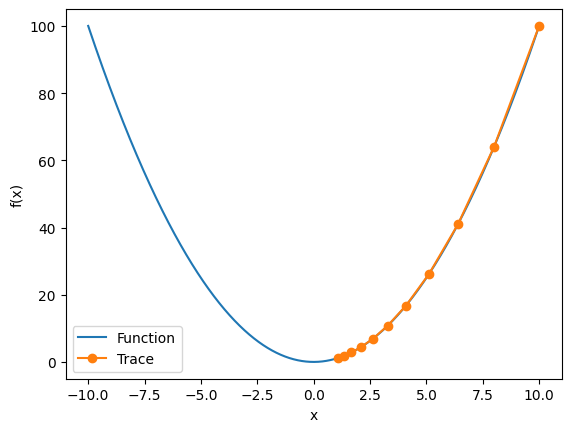

In [ ]:
# x^2 为目标函数，即 f(x) = x^2
get_test(eta=0.1, f_grad=f_grad, f=f)
"""
运行梯度下降算法并展示结果：

参数:
    - eta (float): 学习率，控制每一步更新的大小，此处设置为 0.1
    - f_grad (function): 目标函数的梯度(导数)，传入 f_grad 函数，即 f'(x) = 2*x
    - f (function): 目标函数，默认为 f(x) = x^2

返回值:
    None
"""


epoch 10, x: 8.170728


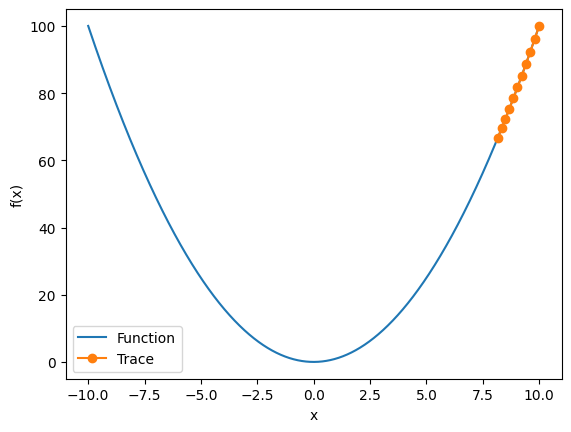

In [ ]:
#学习率设置为0.01
get_test(eta=0.01, f_grad=f_grad, f=f)

epoch 10, x: 3.486784


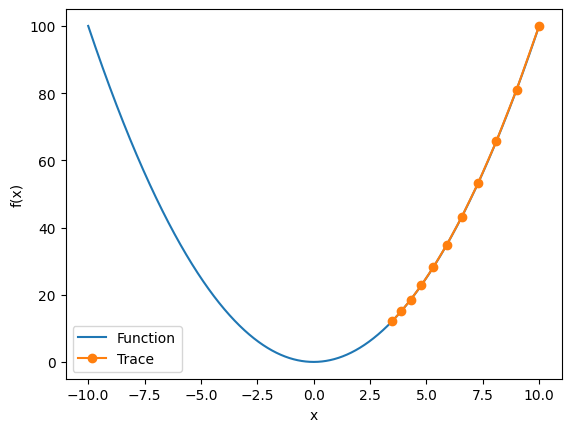

In [ ]:
#学习率设置为0.05
get_test(eta=0.05, f_grad=f_grad, f=f)

为了演示非凸函数的梯度下降，考虑函数$f(x) = x \cdot \cos(cx)$，其中$c$为某常数。
这个函数有无穷多个局部最小值。
根据我们选择的学习率，我们最终可能只会得到许多解的一个。
下面的例子说明了（不切实际的）高学习率如何导致较差的局部最小值。

In [ ]:
import torch  # 导入 PyTorch 库，用于张量计算
c = torch.tensor(0.15 * np.pi)  # 初始化张量 c，值为 0.15 * π

def f2(x):  # 定义目标函数，这里为 x * cos(c * x)
    """
    目标函数 f2(x) = x * cos(c * x)

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的目标函数值
    """
    return x * torch.cos(c * x)

def f_grad2(x):  # 定义目标函数的梯度
    """
    目标函数 f2(x) = x * cos(c * x) 的梯度

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的梯度值
    """
    return torch.cos(c * x) - c * x * torch.sin(c * x)


epoch 10, x: 8.284779


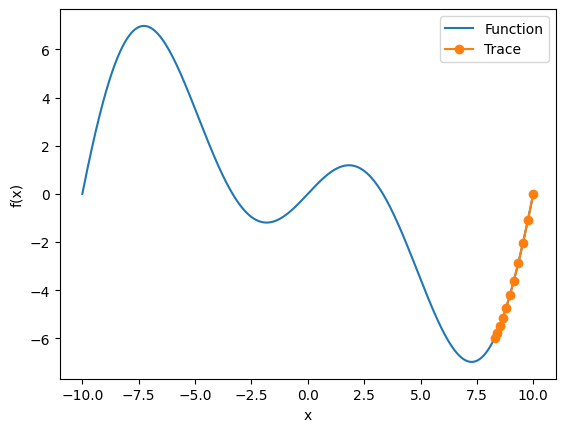

In [ ]:
get_test(eta=0.05, f_grad=f_grad2, f=f2)
"""
运行梯度下降算法并展示结果：

参数:
    - eta (float): 学习率，控制每一步更新的大小，此处设置为 0.05
    - f_grad (function): 目标函数的梯度(导数)，传入 f_grad2 函数，即 f2'(x)
    - f (function): 目标函数，默认为 f2(x) = x * cos(c * x)，传入 f2 函数

返回值:
    None
"""


In [ ]:
c = torch.tensor(0.5)  # 初始化张量 c，值为 0.5

def f(x):  # 定义目标函数，这里为 torch.cosh(c * x)
    """
    目标函数 f(x) = torch.cosh(c * x)

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的目标函数值
    """
    return torch.cosh(c * x)

def f_grad(x):  # 定义目标函数的梯度
    """
    目标函数 f(x) = torch.cosh(c * x) 的梯度

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的梯度值
    """
    return c * torch.sinh(c * x)

def f_hess(x):  # 定义目标函数的 Hessian 矩阵
    """
    目标函数 f(x) = torch.cosh(c * x) 的 Hessian 矩阵

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的 Hessian 矩阵值
    """
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    """
    使用牛顿法进行优化的示例

    参数:
        eta (float): 学习率，控制每一步更新的大小，默认为 1

    返回值:
        list: 包含每一步迭代后的 x 值的列表
    """
    x = 10.0  # 初始值设置为 10.0
    results = [x]  # 保存每一步迭代后的 x 值
    for i in range(10):  # 迭代 10 次
        x -= eta * f_grad(x) / f_hess(x)  # 使用牛顿法更新规则，x = x - learning_rate * (gradient / Hessian)
        results.append(float(x))  # 将当前的 x 值添加到结果列表中
    print('epoch 10, x:', x)  # 打印最终迭代后的 x 值
    return results


epoch 10, x: tensor(0.)


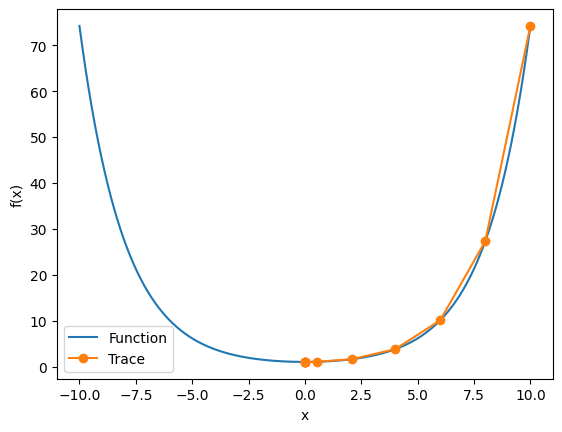

In [ ]:
#使用牛顿法进行优化并展示结果
show_trace(newton(), f)

现在让我们考虑一个非凸函数，比如$f(x) = x \cos(c x)$，$c$为某些常数。
请注意在牛顿法中，我们最终将除以Hessian。
这意味着如果二阶导数是负的，$f$的值可能会趋于增加。
这是这个算法的致命缺陷！

In [ ]:
c = torch.tensor(0.15 * np.pi)  # 初始化张量 c，值为 0.15 * π

def f(x):  # 定义目标函数，这里为 x * cos(c * x)
    """
    目标函数 f(x) = x * torch.cos(c * x)

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的目标函数值
    """
    return x * torch.cos(c * x)

def f_grad(x):  # 定义目标函数的梯度
    """
    目标函数 f(x) = x * torch.cos(c * x) 的梯度

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的梯度值
    """
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # 定义目标函数的 Hessian 矩阵
    """
    目标函数 f(x) = x * torch.cos(c * x) 的 Hessian 矩阵

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的 Hessian 矩阵值
    """
    return -2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)



epoch 10, x: tensor(26.8341)


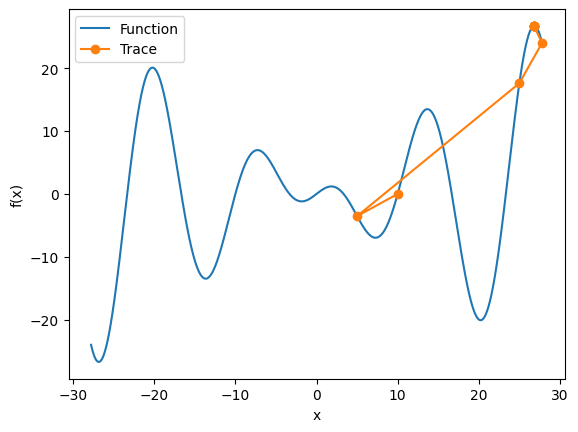

In [ ]:
#使用牛顿法进行优化并展示结果
show_trace(newton(), f)

### 练习11.3.2
 2.在区间$[a, b]$中实现线搜索以最小化凸函数。

  1. 是否需要导数来进行二分搜索，即决定选择$[a, (a+b)/2]$还是$[(a+b)/2, b]$。
  1. 算法的收敛速度有多快？
  1. 实现该算法，并将其应用于求$\log (\exp(x) + \exp(-2x -3))$的最小值。

**解答：**

&emsp;&emsp;（1）在进行线搜索时，通常不需要导数来进行二分搜索。二分搜索可以通过选择区间的中点来进行迭代，即选择 [a, (a+b)/2] 或者 [(a+b)/2, b]。通过比较函数在两个点的取值，可以确定下一步的搜索方向。这种方法不需要导数信息，而是通过比较函数值来判断搜索的方向。

&emsp;&emsp;（2）收敛速度取决于函数的性质以及选择的搜索策略。对于凸函数，线搜索算法通常具有较好的收敛性能。但是具体的收敛速度还会受到函数的形状、初始搜索区间和采取的搜索策略等因素的影响。

&emsp;&emsp;（3）代码实现如下：

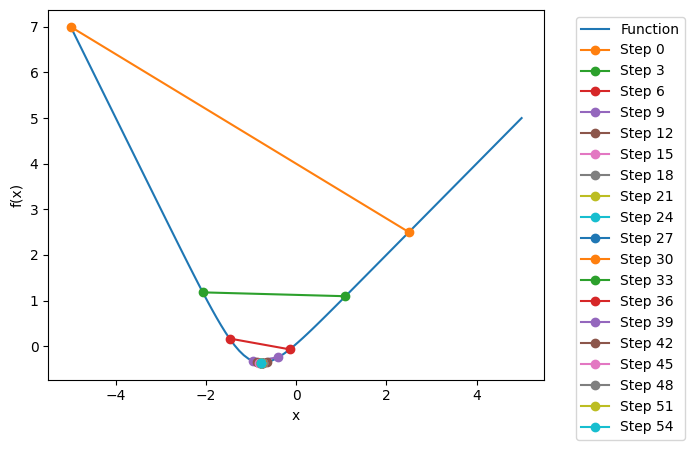

In [ ]:
import numpy as np  # 导入 NumPy 库，用于处理数值计算
import matplotlib.pyplot as plt  # 导入 Matplotlib 库，用于绘图

def convex_function(x):
    """
    定义凸函数 f(x) = log(exp(x) + exp(-2*x-3))

    参数:
        x (float): 输入值

    返回值:
        float: 计算得到的函数值
    """
    return np.log(np.exp(x) + np.exp(-2*x-3))

def line_search(a, b, f, epsilon=1e-6):
    """
    一维线搜索算法

    参数:
        a (float): 搜索区间左端点
        b (float): 搜索区间右端点
        f (function): 待优化的目标函数
        epsilon (float): 搜索精度，默认为 1e-6

    返回值:
        list: 包含搜索过程中每一步区间的左右端点的元组列表
    """
    results = []  # 保存搜索过程中每一步区间的左右端点
    while abs(b - a) > epsilon:  # 当区间长度大于精度时进行迭代
        x1 = a + (b - a) / 4  # 计算左四分之一点
        x2 = b - (b - a) / 4  # 计算右四分之一点
        if f(x1) < f(x2):
            b = x2  # 如果左四分之一点的函数值较小，则将右端点移动到 x2 处
        else:
            a = x1  # 如果右四分之一点的函数值较小，则将左端点移动到 x1 处
        results.append((a, b))  # 将当前的区间左右端点添加到结果列表中
    return results

def plot_trace(x, y, result):
    """
    可视化搜索过程

    参数:
        x (numpy.ndarray): x 值的数组
        y (numpy.ndarray): 对应 x 的函数值的数组
        result (list): 由 line_search 返回的搜索过程中每一步区间的左右端点的元组列表

    返回值:
        None
    """
    plt.plot(x, y, label='Function')  # 绘制凸函数曲线
    for i, (a, b) in enumerate(result[::3]):  # 每隔三步绘制一次搜索区间
        plt.plot([a, b], [convex_function(a), convex_function(b)], '-o', label=f'Step {i*3}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# 在区间 [-5, 5] 上进行线搜索
a, b = -5, 5
results = line_search(a, b, convex_function)
x = np.linspace(-5, 5, 100)
y = convex_function(x)
plot_trace(x, y, results)


### 练习11.3.3
设计一个定义在$\mathbb{R}^2$上的目标函数，它的梯度下降非常缓慢。提示：不同坐标的缩放方式不同。

**解答：**

epoch 20, x1: -0.057646, x2: -0.000073


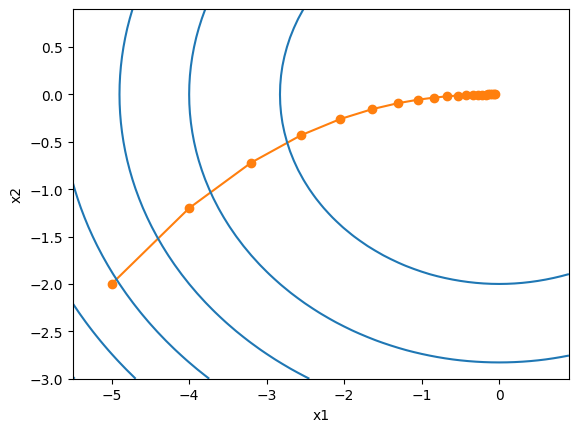

In [ ]:
import numpy as np  # 导入 NumPy 库，用于处理数值计算
import matplotlib.pyplot as plt  # 导入 Matplotlib 库，用于绘图

def train_2d(trainer, steps=20, f_grad=None):
    """
    在二维空间上运行训练过程，并返回每一步的结果

    参数:
        trainer (function): 优化算法的函数
        steps (int): 迭代步数，默认为 20
        f_grad (function): 目标函数的梯度函数，默认为 None

    返回值:
        list: 包含每一步迭代后的 (x1, x2) 坐标的元组列表
    """
    x1, x2, s1, s2 = -5, -2, 0, 0  # 初始化坐标和缩放因子
    results = [(x1, x2)]  # 保存每一步迭代后的 (x1, x2) 坐标
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):
    """
    在二维空间中绘制优化过程的轨迹和等高线图

    参数:
        f (function): 目标函数
        results (list): 优化算法每一步迭代后的 (x1, x2) 坐标的元组列表

    返回值:
        None
    """
    x1, x2 = zip(*results)
    plt.plot(x1, x2, '-o', color='#ff7f0e')  # 绘制优化轨迹
    x1_range = np.arange(-5.5, 1.0, 0.1)
    x2_range = np.arange(-3.0, 1.0, 0.1)
    x1, x2 = np.meshgrid(x1_range, x2_range)
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')  # 绘制目标函数等高线图
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

def f_2d(x1, x2):
    """
    定义二维目标函数 f(x1, x2) = x1^2 + 2 * x2^2

    参数:
        x1 (float): 输入值1
        x2 (float): 输入值2

    返回值:
        float: 计算得到的目标函数值
    """
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):
    """
    定义二维目标函数的梯度函数

    参数:
        x1 (float): x1
        x2 (float): x2

    返回值:
        tuple: 包含 x1 和 x2 方向梯度的元组
    """
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    """
    实现梯度下降算法在二维空间的更新规则

    参数:
        x1 (float): 当前 x1 坐标
        x2 (float): 当前 x2 坐标
        s1 (float): 当前 x1 坐标的缩放因子
        s2 (float): 当前 x2 坐标的缩放因子
        f_grad (function): 目标函数的梯度函数

    返回值:
        tuple: 包含更新后的 x1, x2, s1, s2 的元组
    """
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1  # 学习率
results = train_2d(gd_2d, f_grad=f_2d_grad)
show_trace_2d(f_2d, results)


epoch 100, x1: -4.092834, x2: -0.000000


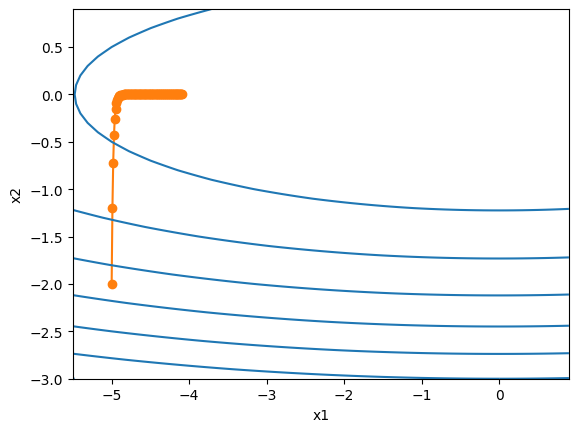

In [ ]:
# a 和 b 为放缩因子
def slow_f_2d(x1, x2, a=0.1, b=1):
    """
    定义在二维空间上的目标函数，其中不同坐标的缩放方式不同。

    参数:
        x1 (float): 输入值1
        x2 (float): 输入值2
        a (float): x1 的缩放因子，默认为 0.1
        b (float): x2 的缩放因子，默认为 1

    返回值:
        float: 计算得到的目标函数值
    """
    return a * x1 ** 2 + b * 2 * x2 ** 2

def slow_f_2d_grad(x1, x2, a=0.01, b=1):
    """
    定义目标函数 slow_f_2d 的梯度函数

    参数:
        x1 (float): 输入值1
        x2 (float): 输入值2
        a (float): x1 的缩放因子，默认为 0.01
        b (float): x2 的缩放因子，默认为 1

    返回值:
        tuple: 包含 x1 和 x2 方向梯度的元组
    """
    return (a * 2 * x1, b * 4 * x2)

eta = 0.1  # 学习率
results = train_2d(gd_2d, steps=100, f_grad=slow_f_2d_grad)
show_trace_2d(slow_f_2d, results)


### 练习11.3.4
使用预处理实现牛顿方法的轻量版本。
使用对角Hessian作为预条件子。
使用它的绝对值，而不是实际值（可能有符号）。
将此应用于上述问题。
将上述算法应用于多个目标函数（凸或非凸）。如果把坐标旋转 45 度会怎么样？

**解答：**

&emsp;&emsp;预处理：计算和存储完整的Hessian非常昂贵，而改善这个问题的一种方法是“预处理”。它回避了计算整个Hessian，而只计算“对角线”项，即如下的算法更新：

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \mathrm{diag}(\mathbf{H})^{-1} \nabla f(\mathbf{x}).$$



In [ ]:


def newton_preconditioned(eta=1):
    """
    使用预条件的牛顿法进行优化的示例

    Parameters:
        eta (float): 学习率，控制每一步更新的大小，默认为 1

    Returns:
        list: 包含每一步迭代后的 x 值的列表
    """
    x = 10.0  # 初始值设置为 10.0
    results = [x]  # 保存每一步迭代后的 x 值
    for i in range(10):  # 迭代 10 次
        preconditioner = torch.abs(f_hess(x))  # 预条件子为 Hessian 矩阵的绝对值
        x -= eta * f_grad(x) / preconditioner  # 使用预条件的牛顿法更新规则，x = x - learning_rate * (gradient / preconditioner)
        results.append(float(x))  # 将当前的 x 值添加到结果列表中
    print('epoch 10, x:', x)  # 打印最终迭代后的 x 值
    return results


epoch 10, x: tensor(0.)


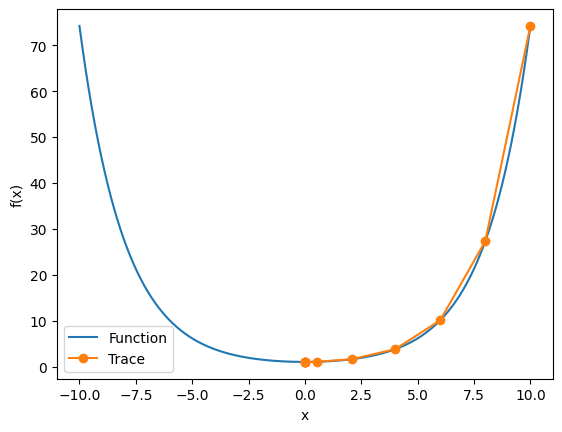

In [ ]:
import torch  # 导入 PyTorch 库，用于张量计算

c = torch.tensor(0.5)  # 初始化张量 c，值为 0.5

def f(x):  # 定义目标函数，这里为 torch.cosh(c * x)
    """
    目标函数 f(x) = torch.cosh(c * x)

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的目标函数值
    """
    return torch.cosh(c * x)

def f_grad(x):  # 定义目标函数的梯度
    """
    目标函数 f(x) = torch.cosh(c * x) 的梯度

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的梯度值
    """
    return c * torch.sinh(c * x)

def f_hess(x):  # 定义目标函数的 Hessian 矩阵
    """
    目标函数 f(x) = torch.cosh(c * x) 的 Hessian 矩阵

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的 Hessian 矩阵值
    """
    return c**2 * torch.cosh(c * x)

results = newton_preconditioned()  # 运行预条件的牛顿法进行优化
show_trace(results, f)  # 展示优化结果的轨迹


epoch 10, x: tensor(20.2219)


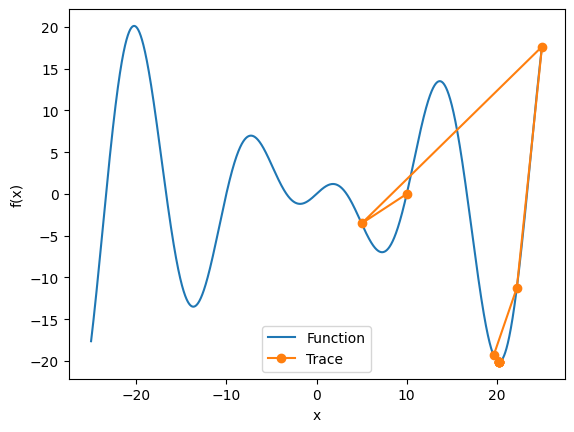

In [ ]:
import torch  # 导入 PyTorch 库，用于张量计算

c = torch.tensor(0.15 * np.pi)  # 初始化张量 c，值为 0.15 * π

def f(x):  # 定义目标函数，这里为 x * torch.cos(c * x)
    """
    目标函数 f(x) = x * torch.cos(c * x)

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的目标函数值
    """
    return x * torch.cos(c * x)

def f_grad(x):  # 定义目标函数的梯度
    """
    目标函数 f(x) = x * torch.cos(c * x) 的梯度

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的梯度值
    """
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # 定义目标函数的 Hessian 矩阵
    """
    目标函数 f(x) = x * torch.cos(c * x) 的 Hessian 矩阵

    参数:
        x (torch.Tensor): 输入张量

    返回值:
        torch.Tensor: 计算得到的 Hessian 矩阵值
    """
    return -2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

results = newton_preconditioned()  # 运行预条件的牛顿法进行优化
show_trace(results, f)  # 展示优化结果的轨迹


epoch 20, x1: -0.000000, x2: -0.000073


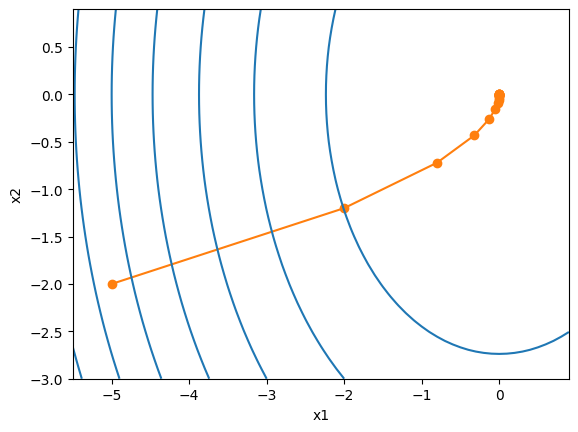

In [ ]:
import numpy as np  # 导入 NumPy 库，用于处理数值计算
import matplotlib.pyplot as plt  # 导入 Matplotlib 库，用于绘图

def train_2d(trainer, steps=20, f_grad=None):
    """
    在二维空间上运行训练过程，并返回每一步的结果

    参数:
        trainer (function): 优化算法的函数
        steps (int): 迭代步数，默认为 20
        f_grad (function): 目标函数的梯度函数，默认为 None

    返回值:
        list: 包含每一步迭代后的 (x1, x2) 坐标的元组列表
    """
    x1, x2, s1, s2 = -5, -2, 0, 0  # 初始化坐标和缩放因子
    results = [(x1, x2)]  # 保存每一步迭代后的 (x1, x2) 坐标
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):
    """
    在二维空间中绘制优化过程的轨迹和等高线图

    参数:
        f (function): 目标函数
        results (list): 优化算法每一步迭代后的 (x1, x2) 坐标的元组列表

    返回值:
        None
    """
    x1, x2 = zip(*results)
    plt.plot(x1, x2, '-o', color='#ff7f0e')  # 绘制优化轨迹
    x1_range = np.arange(-5.5, 1.0, 0.1)
    x2_range = np.arange(-3.0, 1.0, 0.1)
    x1, x2 = np.meshgrid(x1_range, x2_range)
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')  # 绘制目标函数等高线图
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

def f_2d(x1, x2):
    """
    定义二维目标函数 f(x1, x2) = 3 * x1^2 + 2 * x2^2

    参数:
        x1 (float): 输入值1
        x2 (float): 输入值2

    返回值:
        float: 计算得到的目标函数值
    """
    return 3 * x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):
    """
    定义二维目标函数的梯度函数

    参数:
        x1 (float): 输入值1
        x2 (float): 输入值2

    返回值:
        tuple: 包含 x1 和 x2 方向梯度的元组
    """
    return (6 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    """
    实现梯度下降算法在二维空间的更新规则

    参数:
        x1 (float): 当前 x1 坐标
        x2 (float): 当前 x2 坐标
        s1 (float): 当前 x1 坐标的缩放因子
        s2 (float): 当前 x2 坐标的缩放因子
        f_grad (function): 目标函数的梯度函数

    返回值:
        tuple: 包含更新后的 x1, x2, s1, s2 的元组
    """
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1  # 学习率
results = train_2d(gd_2d, f_grad=f_2d_grad)
show_trace_2d(f_2d, results)


epoch 20, x1: 0.000000, x2: 0.000000


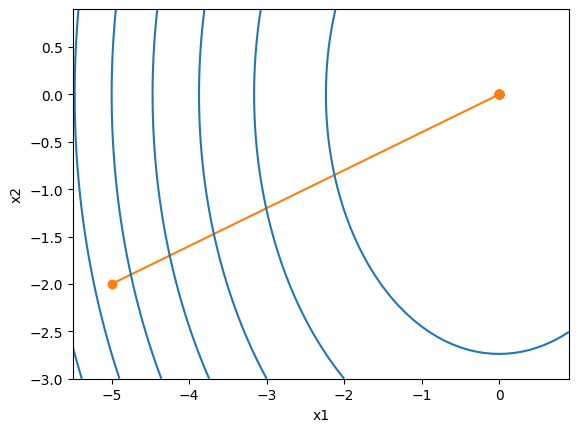

In [ ]:
import math  # 导入 math 库，用于数学计算
import matplotlib.pyplot as plt  # 导入 Matplotlib 库，用于绘图

def rotation(x1, x2):
    """
    对输入坐标进行旋转变换

    参数:
        x1 (float): x1
        x2 (float): x2

    Returns:
        tuple: 旋转后的坐标元组 (xa, xb)
    """
    xa = (x1 + x2) / math.sqrt(2)
    xb = (x2 - x1) / math.sqrt(2)
    return xa, xb

def newton_2d(x1, x2, s1, s2, f_grad, f_hessian):
    """
    实现预处理的牛顿法在二维空间的更新规则

    参数:
        x1 (float): 当前 x1 坐标
        x2 (float): 当前 x2 坐标
        s1 (float): 当前 x1 坐标的缩放因子
        s2 (float): 当前 x2 坐标的缩放因子
        f_grad (function): 目标函数的梯度函数
        f_hessian (function): 目标函数的 Hessian 矩阵函数

    Returns:
        tuple: 包含更新后的 x1, x2, s1, s2 的元组
    """
    g1, g2 = f_grad(x1, x2)
    h11, h12, h21, h22 = f_hessian(x1, x2)

    # 计算预处理的牛顿法步长
    det_hessian = h11 * h22 - h12 * h21
    inv_hessian = (h22 / det_hessian, -h12 / det_hessian, -h21 / det_hessian, h11 / det_hessian)

    # 计算更新后的位置
    delta_x1 = inv_hessian[0] * g1 + inv_hessian[1] * g2
    delta_x2 = inv_hessian[2] * g1 + inv_hessian[3] * g2

    return (x1 - delta_x1, x2 - delta_x2, 0, 0)

def f_hessian(x1, x2):
    """
    定义二维目标函数的 Hessian 矩阵函数

    参数:
        x1 (float): x1
        x2 (float): x2

    Returns:
        tuple: 包含 Hessian 矩阵元素的元组 (h11, h12, h21, h22)
    """
    h11 = 6
    h12 = 0
    h21 = 0
    h22 = 4
    return h11, h12, h21, h22
def show_trace_2d(f, results):
    """
    在二维空间中绘制优化过程的轨迹和等高线图

    参数:
        f (function): 目标函数
        results (list): 优化算法每一步迭代后的 (x1, x2) 坐标的元组列表

    返回值:
        None
    """
    x1, x2 = zip(*results)
    plt.plot(x1, x2, '-o', color='#ff7f0e')  # 绘制优化轨迹
    x1_range = np.arange(-5.5, 1.0, 0.1)
    x2_range = np.arange(-3.0, 1.0, 0.1)
    x1, x2 = np.meshgrid(x1_range, x2_range)
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')  # 绘制目标函数等高线图
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

def train_2d_hessian(trainer, steps=20, f_grad=None, f_hessian=f_hessian, is_rotation=True):
    """
    在二维空间上运行预处理的牛顿法训练过程，并返回每一步的结果

    参数:
        trainer (function): 优化算法的函数
        steps (int): 迭代步数，默认为 20
        f_grad (function): 目标函数的梯度函数，默认为 None
        f_hessian (function): 目标函数的 Hessian 矩阵函数，默认为 f_hessian
        is_rotation (bool): 是否对输入坐标进行旋转，默认为 True

    返回值:
        list: 包含每一步迭代后的 (x1, x2) 坐标的元组列表
    """
    x1, x2, s1, s2 = -5, -2, 0, 0
    if is_rotation:
        x1, x2 = rotation(x1, x2)
    results = [(x1, x2)]  # 保存每一步迭代后的 (x1, x2) 坐标
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad, f_hessian)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_hessian)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

# 运行预处理的牛顿法进行优化
results = train_2d_hessian(newton_2d, f_grad=f_2d_grad, is_rotation=False)
show_trace_2d(f_2d, results)# 展示优化结果的轨迹


epoch 20, x1: 0.000000, x2: 0.000000


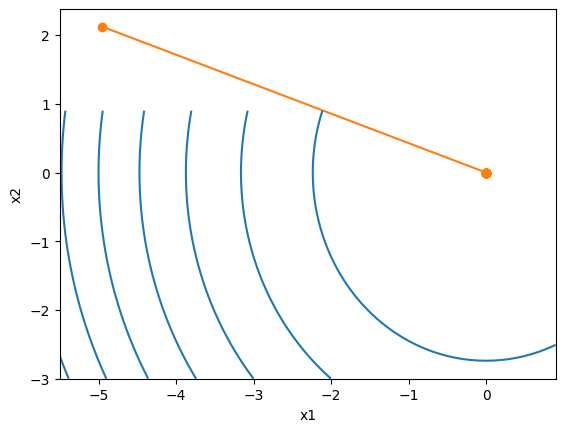

In [ ]:
eta = 0.1  # 学习率，控制每一步更新的大小

results = train_2d_hessian(newton_2d, f_grad=f_2d_grad, is_rotation=True)# 使用预处理的牛顿法进行二维空间的优化，目标函数的梯度为 `f_2d_grad`，开启坐标旋转选项

show_trace_2d(f_2d, results)# 展示优化结果的轨迹和目标函数的等高线图


## 11.4 随机梯度下降

### 练习11.4.1
1.尝试不同的随机梯度下降学习率计划和不同的迭代次数进行实验。特别是，根据迭代次数的函数来绘制与最优解(0,0)的距离。

**解答：**

epoch 50, x1: -0.060110, x2: -0.022708


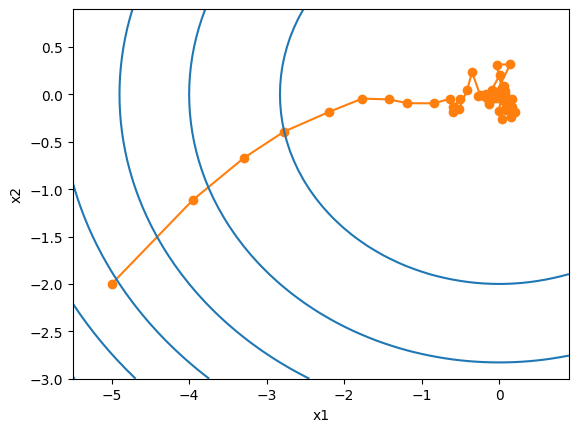

In [ ]:
import torch  # 导入 PyTorch 库，用于张量计算
import matplotlib.pyplot as plt  # 导入 Matplotlib 库，用于绘图

def f(x1, x2):  # 定义目标函数
    """
    目标函数 f(x1, x2) = x1 ** 2 + 2 * x2 ** 2

    参数:
        x1 (float): 输入值1
        x2 (float): 输入值2

    返回值:
        float: 计算得到的目标函数值
    """
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # 定义目标函数的梯度
    """
    目标函数 f(x1, x2) = x1 ** 2 + 2 * x2 ** 2 的梯度

    参数:
        x1 (float): 输入值1
        x2 (float): 输入值2

    返回值:
        tuple: 包含 x1 和 x2 方向梯度的元组
    """
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    """
    使用随机梯度下降（SGD）更新规则进行优化

    参数:
        x1 (float): 当前 x1 坐标
        x2 (float): 当前 x2 坐标
        s1 (float): 当前 x1 坐标的缩放因子
        s2 (float): 当前 x2 坐标的缩放因子
        f_grad (function): 目标函数的梯度函数

    返回值:
        tuple: 包含更新后的 x1, x2, s1, s2 的元组
    """
    g1, g2 = f_grad(x1, x2)
    # 模拟有噪声的梯度
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def show_trace_2d(f, results):
    """
    在二维空间中绘制优化过程的轨迹和等高线图

    参数:
        f (function): 目标函数
        results (list): 优化算法每一步迭代后的 (x1, x2) 坐标的元组列表

    返回值:
        None
    """
    x1, x2 = zip(*results)
    plt.plot(x1, x2, '-o', color='#ff7f0e')  # 绘制优化轨迹
    x1_range = np.arange(-5.5, 1.0, 0.1)
    x2_range = np.arange(-3.0, 1.0, 0.1)
    x1, x2 = np.meshgrid(x1_range, x2_range)
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')  # 绘制目标函数等高线图
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

def constant_lr():
    """
    返回常数学习速率

    返回值:
        int: 常数学习速率
    """
    return 1

eta = 0.1  # 学习速率
lr = constant_lr  # 学习速率函数设置为常数
show_trace_2d(f, train_2d(sgd, steps=50, f_grad=f_grad))


epoch 1000, x1: -0.720066, x2: -0.101066


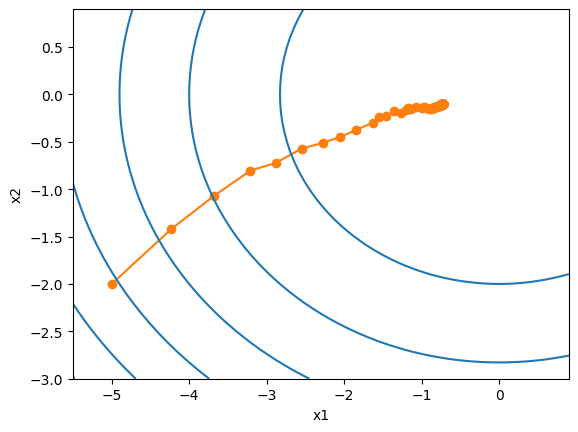

In [ ]:
def exponential_lr():
    """
    指数衰减学习速率函数

    返回值:
        float: 指数衰减学习速率
    """
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1  # 初始化全局变量 t
lr = exponential_lr  # 学习速率函数设置为指数衰减函数
show_trace_2d(f, train_2d(sgd, steps=1000, f_grad=f_grad))


epoch 50, x1: -0.049334, x2: 0.046992


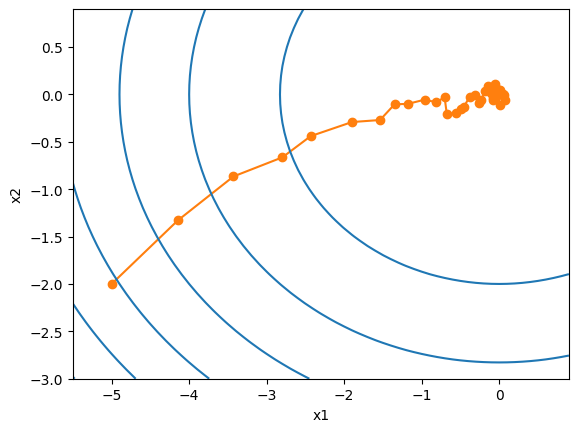

In [ ]:
def polynomial_lr():
    """
    多项式衰减学习速率函数

    返回值:
        float: 多项式衰减学习速率
    """
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1  # 初始化全局变量 t
lr = polynomial_lr  # 学习速率函数设置为多项式衰减函数
show_trace_2d(f, train_2d(sgd, steps=50, f_grad=f_grad))


### 练习11.4.2
证明对于函数$f(x_1, x_2) = x_1^2 + 2 x_2^2$而言，向梯度添加正态噪声等同于最小化损失函数$f(\mathbf{x}, \mathbf{w}) = (x_1 - w_1)^2 + 2 (x_2 - w_2)^2$，其中$\mathbf{x}$是从正态分布中提取的

**解答：**

&emsp;&emsp;证明过程如下：

1. 首先，计算函数$f(x_1, x_2)$的梯度。根据链式法则，我们有：

   $$\frac{\partial f}{\partial x_1} = 2x_1$$
   $$\frac{\partial f}{\partial x_2} = 4x_2$$

2. 然后，计算损失函数$f(\mathbf{x}, \mathbf{w})$的梯度。根据链式法则，我们有：

   $$\frac{\partial f}{\partial w_1} = 2(x_1 - w_1)$$
   $$\frac{\partial f}{\partial w_2} = 4(x_2 - w_2)$$

3. 接下来，我们将向梯度添加正态噪声。设正态噪声为$\mathbf{n} = (n_1, n_2)$，其中$n_1$和$n_2$是从正态分布中提取的随机数。我们可以将梯度添加噪声的操作表示为：

   $$\mathbf{g} = \left(\frac{\partial f}{\partial x_1} + n_1, \frac{\partial f}{\partial x_2} + n_2\right)$$

4. 最后，我们需要证明向梯度添加正态噪声等同于最小化损失函数。我们将证明两种方法的期望值相等。

   首先计算向梯度添加噪声的期望值：

   $$\mathbb{E}[\mathbf{g}] = \left(\mathbb{E}\left[\frac{\partial f}{\partial x_1}\right] + \mathbb{E}[n_1], \mathbb{E}\left[\frac{\partial f}{\partial x_2}\right] + \mathbb{E}[n_2]\right)$$

   由于正态分布的期望值为0，我们有$\mathbb{E}[n_1] = \mathbb{E}[n_2] = 0$。因此，上式可以简化为：

   $$\mathbb{E}[\mathbf{g}] = \left(\mathbb{E}\left[\frac{\partial f}{\partial x_1}\right], \mathbb{E}\left[\frac{\partial f}{\partial x_2}\right]\right)$$

   接下来计算损失函数的梯度的期望值：

   $$\mathbb{E}\left[\frac{\partial f}{\partial w_1}\right] = \mathbb{E}\left[2(x_1 - w_1)\right] = 2\mathbb{E}[x_1] - 2w_1$$
   $$\mathbb{E}\left[\frac{\partial f}{\partial w_2}\right] = \mathbb{E}\left[4(x_2 - w_2)\right] = 4\mathbb{E}[x_2] - 4w_2$$

   最后，我们需要证明
   $$\mathbb{E}[\mathbf{g}] = \left(\mathbb{E}\left[\frac{\partial f}{\partial x_1}\right], \mathbb{E}\left[\frac{\partial f}{\partial x_2}\right]\right) = \left(2\mathbb{E}[x_1] - 2w_1, 4\mathbb{E}[x_2] - 4w_2\right)$$

   由于$x_1$和$x_2$是从正态分布中提取的随机数，其期望值等于其均值。因此，我们有$\mathbb{E}[x_1] = \mathbb{E}[x_2] = 0$。代入上式，我们得到：

   $$\mathbb{E}[\mathbf{g}] = \left(2\mathbb{E}[x_1] - 2w_1, 4\mathbb{E}[x_2] - 4w_2\right) = (0 - 2w_1, 0 - 4w_2) = (-2w_1, -4w_2)$$

   这与损失函数的梯度$\left(\frac{\partial f}{\partial w_1}, \frac{\partial f}{\partial w_2}\right) = (2(x_1 - w_1), 4(x_2 - w_2))$相等。

   因此，我们证明了向梯度添加正态噪声等同于最小化损失函数。

### 练习11.4.3
3. 从$\{(x_1, y_1), \ldots, (x_n, y_n)\}$分别使用替换方法以及不替换方法进行采样时，比较随机梯度下降的收敛性。

**解答：**

&emsp;&emsp;在随机梯度下降算法中，替换方法和不替换方法是两种不同的采样方式，对于每一次迭代，都会从样本集中随机选择一个样本进行梯度计算和参数更新。

- 在替换方法中，每次选择的样本都是独立随机选择的，即每次选择的样本都可能是之前已经选择过的样本。这种方法的优点是可以更快地收敛，因为每次迭代都会使用更多的样本信息进行参数更新。然而，由于每次选择的样本都是独立的，可能会导致某些样本被选择多次，而其他样本则很少被选择到，从而导致样本的分布不均匀，可能会影响算法的收敛性和泛化性能。

- 在不替换方法中，每次选择的样本都是不重复的，即每次选择的样本都不会是之前已经选择过的样本。这种方法的优点是可以保证每个样本都被使用到，从而可以更好地保证样本的分布均匀性。然而，由于每次迭代都只使用一个样本进行参数更新，可能会导致参数更新的方向不够准确，从而影响算法的收敛速度。

因此，替换方法和不替换方法在随机梯度下降算法的收敛性上存在一定的差异。替换方法收敛速度较快，但可能会导致样本分布不均匀；不替换方法可以保证样本分布均匀，但收敛速度较慢。在实际应用中，可以根据具体的问题和需求选择合适的采样方法。

### 练习11.4.4
4.如果某些梯度（或者更确切地说与之相关的某些坐标）始终比所有其他梯度都大，将如何更改随机梯度下降求解器？

**解答：**

&emsp;&emsp;如果某些梯度（或者与之相关的某些坐标）始终比所有其他梯度都大，这可能意味着这些参数的更新过程非常不稳定，可能导致训练过程无法收敛或者收敛非常缓慢。在这种情况下，以下步骤来改进随机梯度下降（SGD）求解器：

1. 梯度截断：首先，可以尝试使用梯度截断技术来限制梯度的大小。通过设置一个阈值，当梯度超过该阈值时，将其缩小到阈值范围内。这样可以避免梯度爆炸的问题。

2. 学习率调整：如果某些梯度始终比其他梯度大，可能意味着学习率过大。尝试减小学习率，可以通过手动设置较小的学习率或者使用自适应学习率算法（如Adam、Adagrad等）来自动调整学习率。

3. 批量规范化：考虑使用批量规范化（Batch Normalization）技术来调整梯度。批量规范化可以通过对每个批次的输入进行归一化来减少梯度的变化范围，从而提高训练的稳定性。

4. 参数初始化：检查参数的初始化方式。如果某些参数初始值较大，可能导致初始梯度也很大，进而影响训练过程。尝试使用较小的初始值或者使用一些特定的参数初始化方法（如Xavier初始化）来减小梯度的大小。

5. 梯度下降变体：考虑使用其他的梯度下降变体。例如，可以尝试使用带动量的随机梯度下降（SGD with Momentum）或者自适应学习率的优化算法（如Adam、Adagrad等），这些算法可以更好地处理不稳定的梯度。

6. 调整网络架构：如果上述方法仍然无法解决问题，可以考虑调整网络架构。可能需要重新设计网络结构，调整层数、神经元数目或者激活函数等，以便更好地处理梯度的不稳定性。



### 练习11.4.5
5.假设$f(x) = x^2 (1 + \sin x)$。$f$有多少局部最小值？请试着改变$f$以尽量减少它需要评估所有局部最小值的方式。

**解答：**

&emsp;&emsp;要确定函数$f(x) = x^2 (1 + \sin x)$的局部最小值的数量，我们需要找到函数的导数，并找到导数为零的点。在这些点上，函数可能具有局部最小值。

&emsp;&emsp;首先，我们计算函数$f(x)$的导数：
$$f'(x) = 2x(1 + \sin x) + x^2 \cos x$$

&emsp;&emsp;要找到导数为零的点，我们解方程$f'(x) = 0$：
$$2x(1 + \sin x) + x^2 \cos x = 0$$

&emsp;&emsp;这是一个非线性方程，很难通过解析方法找到其解。因此，我们可以通过数值方法来近似解。

&emsp;&emsp;为了尽量减少需要评估所有局部最小值的方式，我们可以使用以下策略：
1. 观察函数图像：首先，我们可以绘制函数$f(x)$的图像，观察函数的形状和曲线。这可以帮助我们获得关于函数局部最小值的直观理解，并指导我们在哪些区域进行进一步的分析。
2. 初始点选择：根据观察到的函数图像，我们可以选择一些可能的初始点，这些点可能是导数为零的点。这样可以帮助我们避免评估所有可能的局部最小值。
3. 迭代优化算法：使用迭代优化算法（如梯度下降、牛顿法、拟牛顿法等）来搜索函数的最小值。通过选择适当的初始点和合适的优化算法，我们可以在较少的迭代次数内找到局部最小值。

&emsp;&emsp;请注意，由于函数$f(x)$的非线性性质，可能存在多个局部最小值。因此，找到所有局部最小值可能需要一定的计算成本。通过上述策略，我们可以尽量减少评估所有局部最小值的方式，并更有效地搜索函数的最小值。

<ipython-input-129-4e17c7a29cae>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)  # 将x转换为torch张量，并设置requires_grad=True以计算导数


epoch 10, x: 10.993654


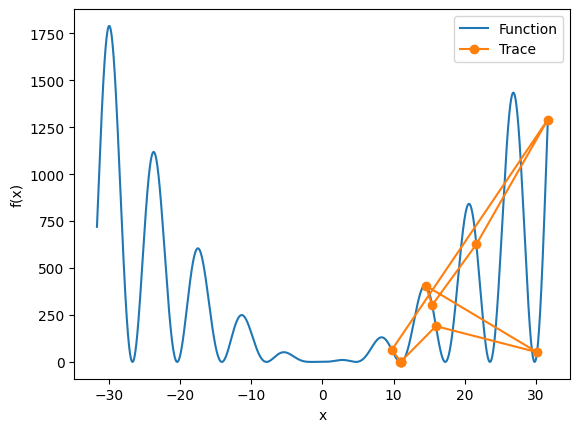

In [ ]:
import numpy as np  # 导入 NumPy 库，用于处理数值计算
import matplotlib.pyplot as plt  # 导入 Matplotlib 库，用于绘图

def f(x):
    """
    定义目标函数 f(x) = x**2 * (1 + np.sin(x))

    参数:
        x (float): 输入值

    返回值:
        float: 计算得到的目标函数值
    """
    return x**2 * (1 + np.sin(x))

def f_prime(x):
    """
    目标函数 f(x) = x**2 * (1 + np.sin(x)) 的梯度

    参数:
        x (float): 输入值

    返回值:
        float: 计算得到的梯度值
    """
    return 2*x*(1 + np.sin(x)) + x**2 * np.cos(x)

def sgd(eta=0.1, f_grad=None):
    """
    随机梯度下降（SGD）优化算法

    参数:
        eta (float): 初始学习速率
        f_grad (function): 目标函数的梯度函数

    返回值:
        list: 包含每次迭代后的 x 值的列表
    """
    x = torch.tensor(10.0)  # 初始化变量 x
    results = [x]  # 保存每次迭代后的 x 值
    for i in range(10):
        g = f_grad(x)  # 计算梯度
        g += torch.normal(0.0, 1, (1,)).item()  # 模拟有噪声的梯度
        eta = eta * lr()  # 调整学习速率
        x -= eta * g  # 更新 x
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

def show_trace(results, f):
    """
    绘制目标函数和梯度下降轨迹

    参数:
        results (list): 包含每一步迭代后的 x 值的列表
        f (function): 目标函数

    返回值:
        None
    """
    n = max(abs(min(results)), abs(max(results)))  # 确定 x 轴的范围
    x = torch.arange(-n, n, 0.01)  # 生成 x 值的范围
    y = f(x)

    plt.plot(x, y, label='Function')  # 绘制目标函数曲线
    plt.plot(results, [f(x) for x in results], '-o', label='Trace')  # 绘制梯度下降轨迹
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    
def constant_lr():
    """
    返回常数学习速率

    返回值:
        float: 常数学习速率
    """
    return 0.8

eta = 0.1  # 初始学习速率
lr = constant_lr  # 学习速率函数设置为常数
# lr = exponential_lr
show_trace(sgd(eta, f_grad), f)  # 展示优化轨迹


## 11.5 小批量随机梯度下降

### 练习11.5.1
1.修改批量大小和学习率，并观察目标函数值的下降率以及每个迭代轮数消耗的时间

**解答：**

In [ ]:
%matplotlib inline  # 用于在Jupyter Notebook中显示matplotlib图形
import numpy as np  # 导入NumPy库，用于数学运算
import torch  # 导入PyTorch库，用于深度学习任务
from torch import nn  # 导入神经网络模块
from d2l import torch as d2l  # 导入“动手学深度学习”中的PyTorch实用函数

In [ ]:
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat', '76e5be1548fd8222e5074cf0faae75edff8cf93f') #读取所需的数据集

def get_data_ch11(batch_size=10, n=1500):
    """
    获取用于章节11的数据集

    参数:
        batch_size (int): 批量大小，默认为10
        n (int): 数据集大小，默认为1500

    返回值:
        tuple: 包含数据迭代器和特征数减一的元组
    """
    # 从URL下载数据，并使用Tab分隔符加载为NumPy数组
    data = np.genfromtxt(d2l.download('airfoil'), dtype=np.float32, delimiter='\t')
    # 将数据转换为PyTorch张量，并进行标准化（减均值，除以标准差）
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    # 创建数据迭代器，加载部分数据
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]), batch_size, is_train=True)
    # 返回数据迭代器和特征数减一的元组
    return data_iter, data.shape[1] - 1 


In [ ]:
def sgd(params, states, hyperparams):
    """
    随机梯度下降（SGD）优化算法的实现

    参数:
        params (list): 待优化的参数列表
        states (list): 用于保存状态的列表
        hyperparams (dict): 超参数字典，包含学习速率 'lr'

    返回值:
        None
    """
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)  # 更新参数值（减去学习速率乘以梯度）
        p.grad.data.zero_()  # 清零梯度


In [ ]:
def train_ch11(trainer_fn, states, hyperparams, data_iter,
               feature_dim, num_epochs=2):
    """
    训练线性回归模型并绘制损失随时间变化的动画

    参数:
        trainer_fn (function): 优化算法的训练函数
        states (list): 用于保存状态的列表
        hyperparams (dict): 超参数字典
        data_iter (DataLoader): 数据迭代器
        feature_dim (int): 特征维度
        num_epochs (int): 训练的轮数，默认为2

    返回值:
        tuple: 训练时间累积和损失随时间变化的元组
    """
    # 初始化模型参数
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1),
                     requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    # 定义线性回归模型和平方损失函数
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    # 初始化动画对象
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    # 初始化训练样本数量和计时器
    n, timer = 0, d2l.Timer()
    # 循环训练模型
    for _ in range(num_epochs):
        for X, y in data_iter:
            # 计算模型预测值的损失
            l = loss(net(X), y).mean()
            # 反向传播计算梯度
            l.backward()
            # 使用优化算法进行参数更新
            trainer_fn([w, b], states, hyperparams)
            # 累积训练样本数量
            n += X.shape[0]
            # 每200个样本记录一次损失和绘制动画
            if n % 200 == 0:
                timer.stop()
                animator.add(n / X.shape[0] / len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss),))
                timer.start()
    # 打印最终损失和平均每轮训练时间
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.avg():.3f} sec/epoch')
    # 返回训练时间累积和损失随时间变化的元组
    return timer.cumsum(), animator.Y[0]


In [ ]:
def train_sgd(lr, batch_size, num_epochs=2):
    """
    使用随机梯度下降（SGD）进行训练的函数

    参数:
        lr (float): 学习速率
        batch_size (int): 批量大小
        num_epochs (int): 训练的轮数，默认为2

    返回值:
        tuple: 训练时间累积和损失随时间变化的元组
    """
    # 获取数据迭代器和特征维度
    data_iter, feature_dim = get_data_ch11(batch_size)
    # 调用train_ch11函数进行训练
    return train_ch11(sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs)


loss: 0.258, 0.109 sec/epoch


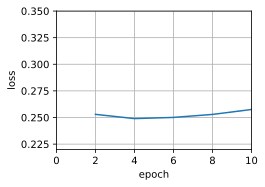

In [ ]:
gd_res = train_sgd(lr=1, batch_size=1500, num_epochs=10)# 调用 train_sgd 函数，传入学习速率 lr=1，批量大小 batch_size=1500，训练轮数 num_epochs=10

loss: 0.243, 0.121 sec/epoch


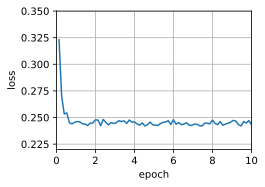

In [ ]:
sgd_res = train_sgd(lr=0.005, batch_size=1, num_epochs=10)# 调用 train_sgd 函数，传入学习速率 lr=0.005，批量大小 batch_size=1，训练轮数 num_epochs=10

loss: 0.249, 0.022 sec/epoch


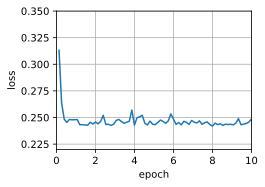

In [ ]:
mini1_res = train_sgd(lr=0.05, batch_size=10 ,num_epochs=10)# 调用 train_sgd 函数，传入学习速率 lr=0.05，批量大小 batch_size=10，训练轮数 num_epochs=10

loss: 0.242, 0.012 sec/epoch


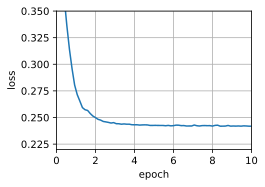

In [ ]:
mini2_res = train_sgd(lr=0.05, batch_size=50 ,num_epochs=10)# 调用 train_sgd 函数，传入学习速率 lr=0.05，批量大小 batch_size=50，训练轮数 num_epochs=10

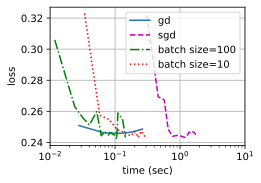

In [ ]:
# 对比4种优化方式的训练结果并绘制图形

# 设置图形大小
d2l.set_figsize([6, 3])

# 调用 d2l.plot 函数绘制图形，对比 gd_res、sgd_res、mini1_res、mini2_res 四种优化方式的训练结果
# x轴为时间（秒），y轴为损失，x轴采用对数刻度
d2l.plot(*list(map(list, zip(gd_res, sgd_res, mini1_res, mini2_res))),
         'time (sec)', 'loss', xlim=[1e-2, 10],
         legend=['gd', 'sgd', 'batch size=100', 'batch size=10'])

# 设置x轴为对数刻度
d2l.plt.gca().set_xscale('log')


### 练习11.5.2
2.将小批量随机梯度下降与实际从训练集中取样替换的变体进行比较。会看出什么？

**解答：**

&emsp;&emsp;小批量随机梯度下降（mini-batch stochastic gradient descent）是梯度下降的一种变体，它在每次迭代中随机选择一小批训练样本来计算梯度并更新模型参数。

&emsp;&emsp;实际从训练集中取样替换的变体（actual sampling with replacement variant）是指每次迭代中从训练集中随机选择一个样本计算梯度并更新模型参数。

&emsp;&emsp;比较两者可以得出以下观察：

1. 计算效率：小批量随机梯度下降通常比实际取样替换的变体更高效。因为小批量随机梯度下降每次迭代计算一小批样本的梯度，可以充分利用矩阵运算的并行性，加快计算速度。而实际取样替换的变体需要每次迭代计算一个样本的梯度，计算效率较低。

2. 收敛速度：小批量随机梯度下降通常比实际取样替换的变体更快收敛。因为小批量随机梯度下降每次迭代使用多个样本的梯度更新模型参数，可以更准确地指导模型向最优解收敛。而实际取样替换的变体每次迭代只使用一个样本的梯度，可能会受到单个样本噪声的干扰，导致收敛速度较慢。

3. 模型稳定性：小批量随机梯度下降通常比实际取样替换的变体更稳定。因为小批量随机梯度下降使用多个样本的梯度进行更新，可以减少单个样本的噪声对模型参数的影响，提高模型的稳定性。而实际取样替换的变体每次迭代只使用一个样本的梯度，容易受到噪声的干扰，导致模型参数波动较大。

&emsp;&emsp;综上所述，小批量随机梯度下降相对于实际取样替换的变体在计算效率、收敛速度和模型稳定性上都有优势。因此，在实际应用中，小批量随机梯度下降更常用和推荐。

### 练习11.5.3
一个邪恶的精灵在没通知你的情况下复制了你的数据集（即每个观测发生两次，数据集增加到原始大小的两倍，但没有人告诉你）。随机梯度下降、小批量随机梯度下降和梯度下降的表现将如何变化？

**解答：**

In [ ]:
%matplotlib inline  # 用于在Jupyter Notebook中显示matplotlib图形
import numpy as np  # 导入NumPy库，用于数学运算
import torch  # 导入PyTorch库，用于深度学习任务
from torch import nn  # 导入神经网络模块
from d2l import torch as d2l  # 导入“动手学深度学习”中的PyTorch实用函数

In [ ]:
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat', '76e5be1548fd8222e5074cf0faae75edff8cf93f') #读取所需的数据集

def get_data_ch11(batch_size=10, n=1500):
    """
    获取用于章节11的数据集

    参数:
        batch_size (int): 批量大小，默认为10
        n (int): 数据集大小，默认为1500

    返回值:
        tuple: 包含数据迭代器和特征数减一的元组
    """
    # 从URL下载数据，并使用Tab分隔符加载为NumPy数组
    data = np.genfromtxt(d2l.download('airfoil'), dtype=np.float32, delimiter='\t')
    # 将数据转换为PyTorch张量，并进行标准化（减均值，除以标准差）
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    # 创建数据迭代器，加载部分数据
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]), batch_size, is_train=True)
    # 返回数据迭代器和特征数减一的元组
    return data_iter, data.shape[1] - 1 


In [ ]:
def sgd(params, states, hyperparams):
    """
    随机梯度下降（SGD）优化算法的实现

    参数:
        params (list): 待优化的参数列表
        states (list): 用于保存状态的列表
        hyperparams (dict): 超参数字典，包含学习速率 'lr'

    返回值:
        None
    """
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)  # 更新参数值（减去学习速率乘以梯度）
        p.grad.data.zero_()  # 清零梯度


In [ ]:
def train_ch11(trainer_fn, states, hyperparams, data_iter,
               feature_dim, num_epochs=2):
    """
    训练线性回归模型并绘制损失随时间变化的动画

    参数:
        trainer_fn (function): 优化算法的训练函数
        states (list): 用于保存状态的列表
        hyperparams (dict): 超参数字典
        data_iter (DataLoader): 数据迭代器
        feature_dim (int): 特征维度
        num_epochs (int): 训练的轮数，默认为2

    返回值:
        tuple: 训练时间累积和损失随时间变化的元组
    """
    # 初始化模型参数
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1),
                     requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    # 定义线性回归模型和平方损失函数
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    # 初始化动画对象
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    # 初始化训练样本数量和计时器
    n, timer = 0, d2l.Timer()
    # 循环训练模型
    for _ in range(num_epochs):
        for X, y in data_iter:
            # 计算模型预测值的损失
            l = loss(net(X), y).mean()
            # 反向传播计算梯度
            l.backward()
            # 使用优化算法进行参数更新
            trainer_fn([w, b], states, hyperparams)
            # 累积训练样本数量
            n += X.shape[0]
            # 每200个样本记录一次损失和绘制动画
            if n % 200 == 0:
                timer.stop()
                animator.add(n / X.shape[0] / len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss),))
                timer.start()
    # 打印最终损失和平均每轮训练时间
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.avg():.3f} sec/epoch')
    # 返回训练时间累积和损失随时间变化的元组
    return timer.cumsum(), animator.Y[0]


In [ ]:
def get_data_ch11_duplicate(batch_size=10, n=1500):
    """
    从 'airfoil' 数据集获取标准化后的数据，并创建用于训练的数据迭代器。

    参数:
    - batch_size: 批量大小，默认为 10。
    - n: 数据集大小，默认为 1500。

    返回值:
    - data_iter: 用于训练的数据迭代器。
    - feature_dim: 特征的数量（不包括目标变量）。
    """
    # 从 'airfoil' 数据集加载数据，并将其转换为 float32 类型的 NumPy 数组
    data = np.genfromtxt(d2l.download('airfoil'), dtype=np.float32, delimiter='\t')
    
    # 通过减去均值并除以标准差，对数据进行标准化
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    
    # 使用 d2l 实用函数创建用于加载数据批次的迭代器
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]), batch_size, is_train=True)
    
    # 返回数据迭代器和特征数量（不包括目标变量）
    return data_iter, data.shape[1] - 1

def train_sgd_duplicate(lr, batch_size, num_epochs=2):
    """
    使用随机梯度下降优化器训练模型。

    参数:
    - lr: 学习率，用于调整模型参数更新的步长。
    - batch_size: 每次训练时用于更新模型的样本批量大小。
    - num_epochs: 训练的轮数，默认为 2。

    返回值:
    训练好的模型参数或其他有用的信息。
    """
    # 获取数据迭代器和特征数量
    data_iter, feature_dim = get_data_ch11_duplicate(batch_size)
    
    # 使用 train_ch11 函数使用随机梯度下降训练模型
    return train_ch11(sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs)


loss: 0.242, 0.012 sec/epoch


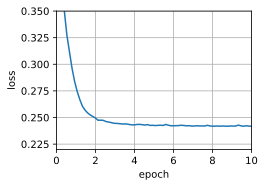

In [ ]:
mini_sgd = train_sgd_duplicate(lr=0.05, batch_size=50 ,num_epochs=10) # 使用学习率为 0.05、批量大小为 50、训练轮数为 10 的随机梯度下降训练模型，并将结果存储在 mini_sgd 变量中

loss: 0.317, 0.150 sec/epoch


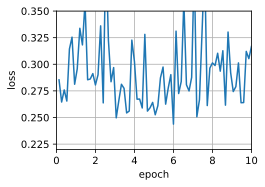

In [ ]:
sgd1 = train_sgd_duplicate(lr=0.05, batch_size=1 ,num_epochs=10) # 使用学习率为 0.05、批量大小为 1、训练轮数为 10 的随机梯度下降训练模型，并将结果存储在 sgd1 变量中

loss: 0.244, 0.113 sec/epoch


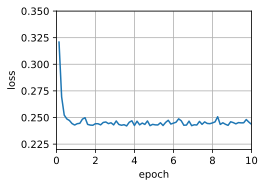

In [ ]:
sgd = train_sgd_duplicate(lr=0.005, batch_size=1 ,num_epochs=10)# 使用学习率为 0.005、批量大小为 1、训练轮数为 10 的随机梯度下降训练模型，并将结果存储在 sgd 变量中

loss: 0.247, 0.047 sec/epoch


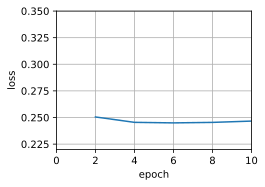

In [ ]:
gd = train_sgd_duplicate(lr=1, batch_size=1500, num_epochs=10)# 使用学习率为 1、批量大小为 1500、训练轮数为 10 的随机梯度下降训练模型，并将结果存储在 gd 变量中

## 11.6 动量法

### 练习11.6.1
使用动量超参数和学习率的其他组合，观察和分析不同的实验结果。


**解答：**

In [ ]:
import torch  # 导入 PyTorch 库，用于深度学习任务
from d2l import torch as d2l  # 导入“动手学深度学习”中的 PyTorch 实用函数

def init_momentum_states(feature_dim):
    """
    初始化动量状态。

    参数:
    - feature_dim: 特征的数量（不包括目标变量）。

    返回值:
    - (v_w, v_b): 权重和偏置的动量状态。
    """
    # 初始化动量状态，v_w 和 v_b 分别对应权重和偏置的动量状态
    v_w = torch.zeros((feature_dim, 1))
    v_b = torch.zeros(1)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    """
    使用动量法更新模型参数。

    参数:
    - params: 待更新的模型参数。
    - states: 模型参数的动量状态。
    - hyperparams: 超参数字典，包括学习率（'lr'）和动量（'momentum'）。

    无返回值。
    """
    # 使用动量法更新模型参数
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams['momentum'] * v + p.grad
            p[:] -= hyperparams['lr'] * v
        p.grad.data.zero_()

def train_momentum(lr, momentum, num_epochs=2):
    """
    使用动量法训练模型。

    参数:
    - lr: 学习率，用于调整模型参数更新的步长。
    - momentum: 动量，用于调整模型参数更新的加权平均。
    - num_epochs: 训练的轮数，默认为 2。

    无返回值。
    """
    # 使用动量法训练模型
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim),
                   {'lr': lr, 'momentum': momentum}, data_iter,
                   feature_dim, num_epochs)

# 获取数据迭代器和特征数量
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)

loss: 0.243, 0.196 sec/epoch


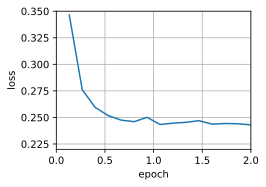

In [ ]:
train_momentum(lr=0.02, momentum=0.5)# 使用学习率为 0.02、动量为 0.5 的动量法训练模型

loss: 0.247, 0.165 sec/epoch


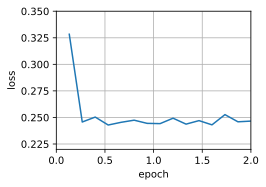

In [ ]:
train_momentum(lr=0.01, momentum=0.9)# 使用学习率为 0.01、动量为 0.9 的动量法训练模型


### 练习11.6.2
试试梯度下降和动量法来解决一个二次问题，其中有多个特征值，即$f(x) = \frac{1}{2} \sum_i \lambda_i x_i^2$，例如$\lambda_i = 2^{-i}$。绘制出$x$的值在初始化$x_i = 1$时如何下降。

**解答：**

In [ ]:
# 导入 PyTorch 和 Matplotlib 库
import torch
import matplotlib.pyplot as plt

def quadratic_function(x):
    """
    定义二次函数。

    参数:
    - x: 输入张量。

    返回值:
    - 二次函数值。
    """
    feature_dim = x.shape[0]
    lambdas = torch.tensor([2**(-i) for i in range(1, feature_dim+1)])
    return 0.5 * torch.sum(lambdas * x**2)

def compute_gradient(x):
    """
    计算二次函数的梯度。

    参数:
    - x: 输入张量。

    返回值:
    - 二次函数的梯度。
    """
    feature_dim = x.shape[0]
    lambdas = torch.tensor([2**(-i) for i in range(1, feature_dim+1)])
    return lambdas * x

def sgd(params, states, hyperparams):
    """
    使用随机梯度下降法更新模型参数。

    参数:
    - params: 待更新的模型参数。
    - states: 用于存储状态的张量，这里为梯度。
    - hyperparams: 超参数字典，包括学习率（'lr'）。

    无返回值。
    """
    lr = hyperparams['lr']
    with torch.no_grad():
        params -= lr * compute_gradient(params)

def init_momentum_states(feature_dim):
    """
    初始化动量状态。

    参数:
    - feature_dim: 特征的数量。

    返回值:
    - 初始动量状态。
    """
    v = torch.zeros(feature_dim)
    return v

def sgd_momentum(params, states, hyperparams):
    """
    使用带动量的随机梯度下降法更新模型参数。

    参数:
    - params: 待更新的模型参数。
    - states: 用于存储状态的张量，这里为梯度的加权平均。
    - hyperparams: 超参数字典，包括学习率（'lr'）和动量（'momentum'）。

    无返回值。
    """
    lr = hyperparams['lr']
    momentum = hyperparams['momentum']
    with torch.no_grad():
        states[:] = momentum * states + compute_gradient(params)
        params -= lr * states

def train(optimizer, lr, momentum, num_epochs=10, mom=True):
    """
    使用指定优化器进行模型训练。

    参数:
    - optimizer: 优化器函数，可以是 sgd 或 sgd_momentum。
    - lr: 学习率。
    - momentum: 动量。
    - num_epochs: 训练的轮数，默认为 10。
    - mom: 是否使用动量，True 为使用，False 为不使用。

    返回值:
    - x_values: 记录每个 epoch 后参数的值的列表。
    """
    feature_dim = 10  # 设置特征维度为10，可以根据实际情况进行调整
    params = torch.ones(feature_dim, requires_grad=True)
    if mom:
        states = init_momentum_states(feature_dim)
    else:
        states = torch.zeros_like(params)

    x_values = []

    for epoch in range(num_epochs):
        loss = quadratic_function(params)
        loss.backward()
        optimizer(params, states, {'lr': lr, 'momentum': momentum})
        params.grad.data.zero_()

        x_values.append(params.clone().detach().numpy())

    return x_values

# 使用 SGD 进行训练
lr = 0.1
momentum = 0.9
x_values_sgd = train(sgd, lr, momentum)

# 使用带动量的 SGD 进行训练
x_values_momentum = train(sgd_momentum, lr, momentum)


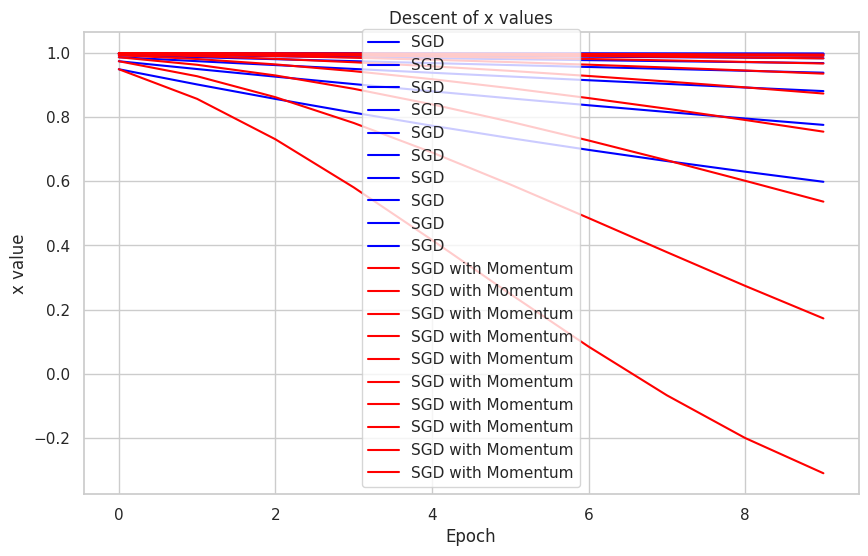

In [ ]:
# 导入 seaborn 库并设置绘图风格为 "whitegrid"
import seaborn as sns
sns.set(style="whitegrid")

# 绘制x值的下降情况
plt.figure(figsize=(10, 6))
plt.plot(x_values_sgd, label='SGD', color='blue')  # 绘制 SGD 的下降曲线，蓝色
plt.plot(x_values_momentum, label='SGD with Momentum', color='red')  # 绘制带动量的 SGD 的下降曲线，红色
plt.xlabel('Epoch')  # x轴标签为 Epoch
plt.ylabel('x value')  # y轴标签为 x value
plt.title('Descent of x values')  # 图表标题为 'Descent of x values'
plt.legend()  # 显示图例
plt.show()  # 展示绘制的图表


### 练习11.6.3
推导$h(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top \mathbf{Q} \mathbf{x} + \mathbf{x}^\top \mathbf{c} + b$的最小值和最小化器。

**解答：**

$$h(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top \mathbf{Q} \mathbf{x} + \mathbf{x}^\top \mathbf{c} + b.$$

&emsp;&emsp;这是一个普通的二次函数。
&emsp;&emsp;对于正定矩阵$\mathbf{Q} \succ 0$，即对于具有正特征值的矩阵，有

&emsp;&emsp;最小化器为$\mathbf{x}^* = -\mathbf{Q}^{-1} \mathbf{c}$，最小值为$b - \frac{1}{2} \mathbf{c}^\top \mathbf{Q}^{-1} \mathbf{c}$。

&emsp;&emsp;证明如下：
&emsp;&emsp;给定函数：

$$h(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top \mathbf{Q} \mathbf{x} + \mathbf{x}^\top \mathbf{c} + b$$

&emsp;&emsp;其中，$\mathbf{x} \in \mathbb{R}^n$, $\mathbf{Q}$ 是一个 $n \times n$ 的正定矩阵，$\mathbf{c} \in \mathbb{R}^n$, $b$ 是一个实数。

&emsp;&emsp;求解步骤：

**Step 1: 求梯度**

&emsp;&emsp;首先计算 $h(\mathbf{x})$ 对 $\mathbf{x}$ 的梯度：

$$
\nabla h(\mathbf{x}) = \nabla \left( \frac{1}{2} \mathbf{x}^\top \mathbf{Q} \mathbf{x} + \mathbf{x}^\top \mathbf{c} + b \right)
= \frac{1}{2} (\mathbf{Q} + \mathbf{Q}^\top) \mathbf{x} + \mathbf{c}.
$$

&emsp;&emsp;由于 $\mathbf{Q}$ 是对称矩阵，所以 $\mathbf{Q} + \mathbf{Q}^\top = 2\mathbf{Q}$。

&emsp;&emsp;因此，梯度可以简化为：

$$
\nabla h(\mathbf{x}) = \mathbf{Qx} + \mathbf{c}.
$$

**Step 2: 解析解**

&emsp;&emsp;要找到使梯度为零的 $\mathbf{x}$，我们解以下方程：

$$
\mathbf{Qx} + \mathbf{c} = 0.
$$

&emsp;&emsp;解得最小化器为：

$$
\mathbf{x}^* = -\mathbf{Q}^{-1} \mathbf{c}.
$$

&emsp;&emsp;这给出了使 $h(\mathbf{x})$ 取得最小值的临界点。

**Step 3: 计算最小值**

&emsp;&emsp;将临界点 $\mathbf{x}^* = -\mathbf{Q}^{-1} \mathbf{c}$ 代入 $h(\mathbf{x})$：

$$
h(\mathbf{x}^*) = \frac{1}{2} \left( -\mathbf{Q}^{-1} \mathbf{c} \right)^\top \mathbf{Q} \left( -\mathbf{Q}^{-1} \mathbf{c} \right) + \left( -\mathbf{Q}^{-1} \mathbf{c} \right)^\top \mathbf{c} + b.
$$

&emsp;&emsp;经过推导和化简，我们得到最小值为：

$$
h(\mathbf{x}^*) = b - \frac{1}{2} \mathbf{c}^\top \mathbf{Q}^{-1} \mathbf{c}.
$$

&emsp;&emsp;以上是对给定函数中最小化器和最小值的证明。

### 练习11.6.4
当我们执行带动量法的随机梯度下降时会有什么变化？当我们使用带动量法的小批量随机梯度下降时会发生什么？试验参数如何？

**解答：**

In [ ]:

import numpy as np  # 导入NumPy库，用于数学运算
import torch  # 导入PyTorch库，用于深度学习任务
from torch import nn  # 导入神经网络模块
from d2l import torch as d2l  # 导入“动手学深度学习”中的PyTorch实用函数
def get_data_ch11(batch_size=10, n=1500):
    """
    获取用于章节11的数据集

    参数:
        batch_size (int): 批量大小，默认为10
        n (int): 数据集大小，默认为1500

    返回值:
        tuple: 包含数据迭代器和特征数减一的元组
    """
    # 从URL下载数据，并使用Tab分隔符加载为NumPy数组
    data = np.genfromtxt(d2l.download('airfoil'), dtype=np.float32, delimiter='\t')
    # 将数据转换为PyTorch张量，并进行标准化（减均值，除以标准差）
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    # 创建数据迭代器，加载部分数据
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]), batch_size, is_train=True)
    # 返回数据迭代器和特征数减一的元组
    return data_iter, data.shape[1] - 1 
def sgd(params, states, hyperparams):
    """
    随机梯度下降（SGD）优化算法的实现

    参数:
        params (list): 待优化的参数列表
        states (list): 用于保存状态的列表
        hyperparams (dict): 超参数字典，包含学习速率 'lr'

    返回值:
        None
    """
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)  # 更新参数值（减去学习速率乘以梯度）
        p.grad.data.zero_()  # 清零梯度

def train_sgd(lr, batch_size, num_epochs=2):
    """
    使用随机梯度下降法训练模型。

    参数:
    - lr: 学习率，用于调整模型参数更新的步长。
    - batch_size: 每次训练时用于更新模型的样本批量大小。
    - num_epochs: 训练的轮数，默认为 2。

    返回值:
    训练好的模型参数或其他有用的信息。
    """
    data_iter, feature_dim = get_data_ch11(batch_size)
    return train_ch11(
        sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs)

def train_momentum(lr, momentum, num_epochs=2):
    """
    使用动量法训练模型。

    参数:
    - lr: 学习率，用于调整模型参数更新的步长。
    - momentum: 动量，用于调整模型参数更新的加权平均。
    - num_epochs: 训练的轮数，默认为 2。

    无返回值。
    """
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim),
                   {'lr': lr, 'momentum': momentum}, data_iter,
                   feature_dim, num_epochs)

def train_momentum_mini_sgd(lr, batch_size, momentum, num_epochs=2):
    """
    使用带动量的随机梯度下降法训练模型。

    参数:
    - lr: 学习率，用于调整模型参数更新的步长。
    - batch_size: 每次训练时用于更新模型的样本批量大小。
    - momentum: 动量，用于调整模型参数更新的加权平均。
    - num_epochs: 训练的轮数，默认为 2。

    返回值:
    训练好的模型参数或其他有用的信息。
    """
    data_iter, feature_dim = get_data_ch11(batch_size)
    return train_ch11(sgd_momentum, init_momentum_states(feature_dim),
                   {'lr': lr, 'momentum': momentum}, data_iter,
                   feature_dim, num_epochs)



loss: 0.256, 0.010 sec/epoch


([0.009358644485473633,
  0.018602371215820312,
  0.033394813537597656,
  0.046602725982666016,
  0.05589103698730469,
  0.06343984603881836,
  0.07286882400512695,
  0.0819542407989502,
  0.0899808406829834,
  0.1012260913848877,
  0.10823273658752441,
  0.11756467819213867,
  0.12543272972106934,
  0.13646173477172852,
  0.14547348022460938,
  0.16164088249206543,
  0.16751933097839355,
  0.17676424980163574,
  0.1831367015838623,
  0.19231414794921875,
  0.19889307022094727,
  0.20941829681396484,
  0.22132658958435059,
  0.23333287239074707,
  0.24092578887939453,
  0.255115270614624,
  0.2617835998535156,
  0.26881861686706543,
  0.28046107292175293,
  0.2882564067840576,
  0.29537439346313477,
  0.312119722366333,
  0.32276248931884766,
  0.33200669288635254,
  0.3423175811767578,
  0.3501245975494385,
  0.35841798782348633,
  0.37256574630737305,
  0.3837928771972656,
  0.39443349838256836,
  0.4036686420440674,
  0.4134087562561035,
  0.42447924613952637,
  0.4357783794403076,


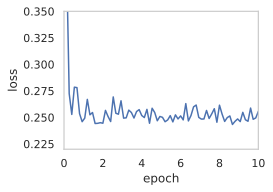

In [ ]:
train_momentum_mini_sgd(lr=0.05, batch_size=50, momentum=0.9 ,num_epochs=10)# 使用带动量的随机梯度下降法训练模型，设置学习率为 0.05、批量大小为 50、动量为 0.9，训练轮数为 10

loss: 0.247, 0.121 sec/epoch


([0.1437983512878418,
  0.23876953125,
  0.3465588092803955,
  0.4689216613769531,
  0.5945520401000977,
  0.6977694034576416,
  0.7939465045928955,
  0.8971412181854248,
  1.0060510635375977,
  1.1108214855194092,
  1.2186241149902344,
  1.3186967372894287,
  1.4275116920471191,
  1.541830062866211,
  1.6460797786712646,
  1.7679290771484375,
  1.9159116744995117,
  2.107617139816284,
  2.2708587646484375,
  2.3700742721557617,
  2.4778153896331787,
  2.600879430770874,
  2.716142177581787,
  2.8188159465789795,
  2.9307990074157715,
  3.0386407375335693,
  3.139930009841919,
  3.244142770767212,
  3.349316358566284,
  3.4544832706451416,
  3.55359148979187,
  3.6574454307556152,
  3.756129026412964,
  3.8823087215423584,
  4.006078243255615,
  4.142263412475586,
  4.329652786254883,
  4.504828453063965,
  4.681985855102539,
  4.8113853931427,
  4.931288957595825,
  5.035146474838257,
  5.144930839538574,
  5.270723342895508,
  5.3815460205078125,
  5.501541614532471,
  5.614099502563

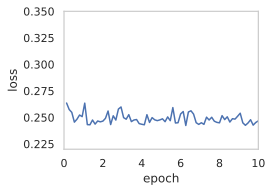

In [ ]:
train_momentum_mini_sgd(lr=0.001, batch_size=1, momentum=0.9 ,num_epochs=10)# 使用带动量的随机梯度下降法训练模型，设置学习率为 0.001、批量大小为 1、动量为 0.9，训练轮数为 10

## 11.7 AdaGrad算法

### 练习11.7.1

证明对于正交矩阵$\mathbf{U}$和向量$\mathbf{c}$，以下等式成立：$\|\mathbf{c} - \mathbf{\delta}\|_2 = \|\mathbf{U} \mathbf{c} - \mathbf{U} \mathbf{\delta}\|_2$。为什么这意味着在变量的正交变化之后，扰动的程度不会改变？

**解答：**

&emsp;&emsp;首先证明该等式成立：

&emsp;&emsp;等式左侧可以展开为：

$$||c - \delta\|^2 = (c - \delta)^T(c - \delta) = c^Tc - 2c^T\delta + \delta^T\delta$$

&emsp;&emsp;等式右侧可以展开为：

$$\|Uc - U\delta\|^2 = (Uc - U\delta)^T(Uc - U\delta) = c^TU^TUc - 2c^TU^TU\delta + \delta^TU^TU\delta$$

&emsp;&emsp;由于 $\mathbf{U}$ 为正交矩阵，即：

$$U^TU = I$$

&emsp;&emsp;所以可得：

$$c^TU^TUc = c^Tc, c^TU^TU\delta = c^T\delta, \delta^TU^TU\delta = \delta^T\delta$$

&emsp;&emsp;带入以上展开式可证：

$$\|\mathbf{c} - \mathbf{\delta}\|_2 = \|\mathbf{U} \mathbf{c} - \mathbf{U} \mathbf{\delta}\|_2$$

&emsp;&emsp;为什么这意味着在变量的正交变化之后，扰动的程度不会改变：

&emsp;&emsp;我们可以将扰动的程度理解为变换之后的向量与原向量的距离，即假设我们有扰动变量 $\delta$，那么扰动的程度即为原变量 $x$ 与扰动后变量 $x+\delta$ 的距离，即 $||x - (x+\delta)||_2$，而我们已经证明，乘以正交矩阵之后该距离没有变化，因此扰动的程度没有改变。

### 练习11.7.2

尝试对函数$f(\mathbf{x}) = 0.1 x_1^2 + 2 x_2^2$、以及它旋转45度后的函数即$f(\mathbf{x}) = 0.1 (x_1 + x_2)^2 + 2 (x_1 - x_2)^2$使用AdaGrad算法。它的表现会不同吗？

**解答：**

我们首先对 $f(x) = 0.1x_1^2 + 2x_2^2$ 使用 AdaGrad 算法：

epoch 20, x1: -2.382563, x2: -0.158591


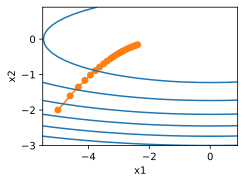

In [ ]:
# 在 Jupyter Notebook 中使用 Matplotlib 绘图
%matplotlib inline
import math  # 导入 math 库，用于数学计算
import torch  # 导入PyTorch库，用于深度学习任务
from d2l import torch as d2l  # 导入“动手学深度学习”中的PyTorch实用函数

def adagrad_2d(x1, x2, s1, s2):
    """
    使用 Adagrad 算法更新二维模型参数。

    参数:
    - x1, x2: 当前模型参数的两个维度。
    - s1, s2: 当前模型参数对应的累积平方梯度。
    
    返回值:
    - 更新后的模型参数和累积平方梯度。
    """
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    """
    定义二维函数。

    参数:
    - x1, x2: 输入值。

    返回值:
    - 二维函数值。
    """
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
# 使用 Adagrad 算法进行二维模型参数更新，并展示更新轨迹
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))


接着对旋转后的函数 $f(\mathbf{x}) = 0.1 (x_1 + x_2)^2 + 2 (x_1 - x_2)^2$ 使用 AdaGrad 算法：

epoch 20, x1: -3.180865, x2: -3.062780


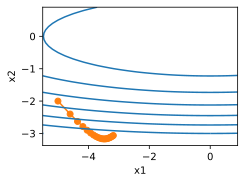

In [ ]:
# 在 Jupyter Notebook 中使用 Matplotlib 绘图
%matplotlib inline
import math  # 导入 math 库，用于数学计算
import torch  # 导入 PyTorch 库，用于深度学习任务
from d2l import torch as d2l  # 导入“动手学深度学习”中的 PyTorch 实用函数

def adagrad_2d(x1, x2, s1, s2):
    """
    使用 Adagrad 算法更新二维模型参数。

    参数:
    - x1, x2: 当前模型参数的两个维度。
    - s1, s2: 当前模型参数对应的累积平方梯度。
    
    返回值:
    - 更新后的模型参数和累积平方梯度。
    """
    eps = 1e-6
    g1, g2 = 4.2 * x1 - 3.8 * x2, 4.2 * x2 - 3.8 * x1
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d_2(x1, x2):
    """
    定义二维函数。

    参数:
    - x1, x2: 输入值。

    返回值:
    - 二维函数值。
    """
    return 0.1 * (x1 + x2) ** 2 + 2 * (x1 - x2) ** 2

eta = 0.4
# 使用 Adagrad 算法进行二维模型参数更新，并展示更新轨迹
d2l.show_trace_2d(f_2d_2, d2l.train_2d(adagrad_2d))


可以看到，两者的步长都是逐渐衰减的。

### 练习11.7.3

证明[格什戈林圆盘定理](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem)，其中提到，矩阵$\mathbf{M}$的特征值$\lambda_i$在至少一个$j$的选项中满足$|\lambda_i - \mathbf{M}_{jj}| \leq \sum_{k \neq j} |\mathbf{M}_{jk}|$的要求。

**解答：**

&emsp;&emsp;我们假设 $\zeta$ 是 $M$ 对应特征值 $\lambda_i$ 的特征向量，即：

$$ \lambda_i M = \zeta \lambda_i $$

&emsp;&emsp;将上式改写为线性方程组形式：

$$
\begin{cases}
M_{11}x_1 + M_{12}x_2 + ... + M_{1n}x_n = \lambda_ix_1\\
M_{21}x_1 + M_{22}x_2 + ... + M_{2n}x_n = \lambda_ix_2\\
...\\
M_{n1}x_1 + M_{n2}x_2 + ... + M_{nn}x_n = \lambda_ix_n
\end{cases}
$$

&emsp;&emsp;我们假设：

$$argmax |x_n| = j $$

&emsp;&emsp;则根据上式变化可得：

$$(\lambda_i - M_{jj})x_j = M_{j1}x_1 + M_{j2}x_2 + ... + M_{jn}x_n$$

则

$$|\lambda_i - M_{jj}||x_j| \leq |M_{j1}||x_1| + |M_{j2}||x_2| + ... + |M_{jn}||x_n| $$

$$|\lambda_i - M_{jj}||x_j| \leq ({M_{j1}} + ... M_{jn})|x_j|$$

&emsp;&emsp;则证得：

$$|\lambda_i - M_{jj}| \leq \sum_{k != j}|M_{jk}|$$

### 练习11.7.4

关于对角线预处理矩阵$\mathrm{diag}^{-\frac{1}{2}}(\mathbf{M}) \mathbf{M} \mathrm{diag}^{-\frac{1}{2}}(\mathbf{M})$的特征值，格什戈林的定理告诉了我们什么？

**解答：**

&emsp;&emsp;格什戈林定理可用于估计对角线预处理矩阵的特征值：

&emsp;&emsp;当我们需要求解矩阵 $M$ 的特征值和特征向量，即对：

$$Mx = \lambda x$$

&emsp;&emsp;其中 x 是非零特征向量，$\lambda$ 是对应的特征值。对角线预处理矩阵 $D$ 通常是 $M$ 的对角线元素的逆构成的对角矩阵，即

$$D = diag^{-\frac{1}{2}}(M)Mdiag^{-\frac{1}{2}}$$

&emsp;&emsp;则经过对角线预处理之后，我们需要求解的特征值问题为：

$$Dz = \mu z$$

&emsp;&emsp;其中，$z = diag^{-\frac{1}{2}}(x)$，$\mu = \lambda$。

&emsp;&emsp;再根据格舍高林定理可得，对角线预处理后的矩阵 $M$ 的特征值 $\mu$ 落在以 $M$ 的对角线元素为中心、以各行非对角线元素绝对值之和为半径的圆盘内。换句话说，对角线预处理后的特征值分布在一些以对角线元素为中心的圆盘内。

### 练习11.7.5

尝试对适当的深度网络使用AdaGrad算法，例如，6.6节中应用于Fashion-MNIST的深度网络。

**解答：**

In [ ]:
# 在 Jupyter Notebook 中使用 Matplotlib 绘图
%matplotlib inline

# 导入 math 库，用于数学计算
import math  

# 导入 PyTorch 库，用于深度学习任务
import torch  
from torch import nn  

# 导入“动手学深度学习”中的 PyTorch 实用函数
from d2l import torch as d2l  

# 定义 LeNet 模型
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

# 设置批量大小
batch_size = 256  

# 加载 Fashion MNIST 数据集
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)  

def evaluate_accuracy_gpu(net, data_iter, device=None):
    """使用 GPU 计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT 微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用 GPU 训练模型(在第六章定义)"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    
    # 创建动画效果
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            
            # 每个 epoch 结束时，记录训练和测试精度
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        
        # 计算测试精度
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

# 在 GPU 上训练 LeNet 模型
train_ch6(net, train_iter, test_iter, num_epochs=10, lr=0.9, device=torch.device('cuda'))


In [ ]:
lr, num_epochs = 0.9, 20
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

接着，我们将 SGD 优化器替换为 AdaGrad 优化器：

In [ ]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

#@save
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型(在第六章定义)"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.Adagrad(net.parameters())
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

In [ ]:
lr, num_epochs = 0.9, 20
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

可以看出，使用 AdaGrad 算法在一开始 loss 下降得更陡峭、迅速，但随后 loss 下降速度开始衰减，显著慢于使用 SGD 算法，以及 20 个 epoch 迭代之后我们对比发现，虽然 AdaGrad 算法在前3个 epoch 就实现了 loss 的骤降，但最终并没能实现稳定的收敛。

### 练习11.7.6        
        
要如何修改AdaGrad算法，才能使其在学习率方面的衰减不那么剧烈？

**解答：**

AdaGrad 算法之所以在学习率方面的衰减会越发激进，是因为 AdaGrad 算法会累积历史梯度，造成后续学习率很小，权值无法得到有效更新。

为改进这一问题，有学者提出了 RMSProp 算法，该算法增加了一个衰减系数来控制历史信息的获取，即我们在下一章将要学习的算法。

## 11.8 RMSProp算法

### 练习11.8.1
如果我们设置$\gamma = 1$，实验会发生什么？为什么？

**解答：**

如果我们设置 $\gamma$ 为1，则状态矢量 $s_t$ 的更新函数变为：

$$s_t \leftarrow s_{t-1} = s_0 = 0$$

也就是状态矢量将保持不变为0，则自变量更新函数变为：

$$x_t \leftarrow x_{t-1} - \frac{\eta}{\sqrt{\epsilon}}\odot g(t)$$

因此，步长将不会发生改变，将变成确定步长优化。

### 练习11.8.2
旋转优化问题以最小化$f(\mathbf{x}) = 0.1 (x_1 + x_2)^2 + 2 (x_1 - x_2)^2$。收敛会发生什么？

**解答：**

我们首先观察原优化问题：

epoch 20, x1: -0.010599, x2: 0.000000


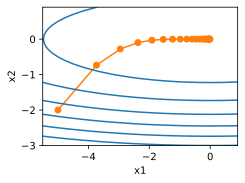

In [ ]:
import math
import torch
from d2l import torch as d2l

def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

再关注旋转后的优化问题

epoch 20, x1: -0.927150, x2: -0.914018


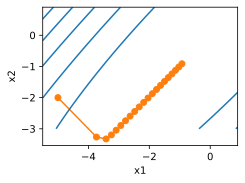

In [ ]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 4.2 * x1 - 3.8 * x2, 4.2 * x2 - 3.8 * x1, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * (x1 + x2) ** 2 + 2 * (x1 - x2) ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

可见，旋转之后的优化问题收敛效果显著变差。

### 练习11.8.3
尝试在真正的机器学习问题上应用RMSProp算法会发生什么，例如在Fashion-MNIST上的训练。试验不同的取值来调整学习率。

**解答：**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

def evaluate_accuracy_gpu(net, data_iter, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]


def train_ch6(net, train_iter, test_iter, num_epochs,device):
    """用GPU训练模型(在第六章定义)"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.RMSprop(net.parameters(), alpha= 0.9)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

100%|██████████| 26421880/26421880 [00:01<00:00, 19463394.71it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 301472.56it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5532661.80it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14860479.69it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


KeyboardInterrupt: ignored

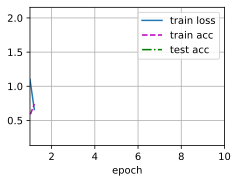

In [ ]:
num_epochs = 10
train_ch6(net, train_iter, test_iter, num_epochs, d2l.try_gpu())

### 练习11.8.4

随着优化的进展，需要调整$\gamma$吗？RMSProp算法对此的敏感程度如何？

**解答：**

RMSProp 算法对 $\gamma$ 是比较敏感的，其取值对最终优化结果有较大影响；例如，在上一题应用 RMSProp 算法来优化 Mnist 数据集上的分类问题时，我们会发现使用默认的 $\gamma = 0.99$ 优化效果很不好，loss 几乎不下降；设置 $\gamma = 0.9$ 时，loss 得到了快速的下降。

由于 $\gamma$ 决定了在调整每坐标比例时历史记录的时长，当其值越大，步长衰减的速度就越慢；因此，我们应该在优化的初期设置较大的 $\gamma$ 值，在优化的后期设置较小的 $\gamma$ 值。

## 11.9 Adadelta

### 练习11.9.1
调整$\rho$的值，会发生什么？


**解答：**

In [ ]:
def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            # In-placeupdatesvia[:]
            s[:] = rho * s + (1 - rho) * torch.square(p.grad)
            g = (torch.sqrt(delta + eps) / torch.sqrt(s + eps)) * p.grad
            p[:] -= g
            delta[:] = rho * delta + (1 - rho) * g * g
        p.grad.data.zero_()


loss: 0.246, 0.277 sec/epoch


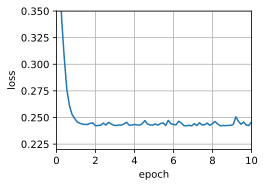

In [ ]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adadelta,
        init_adadelta_states(feature_dim),
        {'rho': 0.9},
        data_iter, feature_dim, num_epochs=10);

# 直接调用torch的api
# trainer = torch.optim.Adadelta
# d2l.train_concise_ch11(trainer, {'rho': 0.5}, data_iter)

loss: 0.243, 0.190 sec/epoch


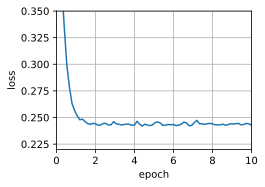

In [ ]:
d2l.train_ch11(adadelta,
        init_adadelta_states(feature_dim),
        {'rho': 0.6},
        data_iter, feature_dim, num_epochs=10);

loss: 0.245, 0.196 sec/epoch


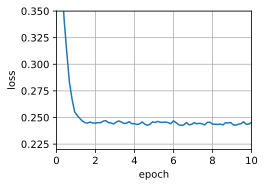

In [ ]:
d2l.train_ch11(adadelta,
        init_adadelta_states(feature_dim),
        {'rho': 0.3},
        data_iter, feature_dim, num_epochs=10);

- 在这个数据集上参数$\rho$的影响不大，loss均收敛。

$\rho$ 实则控制了优化时当前梯度和历史梯度的比例，当 $\rho$ 值越大，调整后梯度会更多地倾向于历史梯度；当 $\rho$ 值越小，调整后梯度会更多地倾向于当前梯度。

事实上，当 $\rho$ 越大，变化量衰减的速度就越慢；当 $\rho$ 越小，变化率衰减的速度就越快。

### 练习11.9.2
展示如何在不使用$\mathbf{g}_t'$的情况下实现算法。为什么这是个好主意？


**解答：**

暂时没做出来，不使用g的话，梯度无法更新，

### 练习11.9.3

Adadelta真的是学习率为0吗？能找到Adadelta无法解决的优化问题吗？


**解答：**

- Adadelta算法中的学习率并不是固定为0。对于Adadelta算法，学习率是动态调整的，并且不需要手动设置一个固定的学习率值。

Adadelta算法维护一个状态变量来存储这个指数移动平均值，并使用该变量来计算每个参数更新的学习率。


Adadelta 不能解决的优化问题包括：

1. 高度非凸问题:
Adadelta是基于梯度信息的自适应学习率算法。在高度非凸的优化问题中，梯度可能会变化非常剧烈，导致Adadelta难以适应这种剧烈变化。相比之下，一些更复杂的优化算法，如具有动量的随机梯度下降（SGD with momentum）或Adam可能能更好地处理这种情况。

2. 离散优化问题:
Adadelta假设参数的连续更新，而在离散优化问题中，参数可能只能取离散的值。这种情况下，Adadelta可能不是最适合的选择。在离散优化问题中，特定的优化算法，如遗传算法或模拟退火等可能更适合。

3. 奇异性质的问题:
一些优化问题可能具有奇异性质，即梯度在某些点上可能不存在或变得非常大。这种情况下，Adadelta可能会遇到数值稳定性的问题，因为它涉及梯度的平方根。其他一些优化算法可能会采取特殊的处理方式来处理奇异点。


### 练习11.9.4

将Adadelta的收敛行为与AdaGrad和RMSProp进行比较。

**解答：**

- AdaGrad 会自适应地调整学习率，使稀疏特征对应的参数具有较大的学习率，但是可能会在后期过早停止学习，因为梯度的平方和随时间增加，导致学习率变得很小，减缓了参数更新的速度；

- 而RMSProp 就是针对这一问题做出了优化，引入指数加权移动平均来平滑梯度的历史平方和，减缓了学习率的衰减，对学习率的适应性更好，能够更稳定地收敛到最优解；

- AdaDelta 则是在 RMSProp 上做出进一步改进，避免了手动设置学习率，通常能更稳定地收敛到最优解，而且避免了手动调整学习率可能导致的参数不正确带来的不收敛。

## 11.10 Adam算法

### 练习11.10.1
调节学习率，观察并分析实验结果。

**解答：**

loss: 0.244, 0.196 sec/epoch


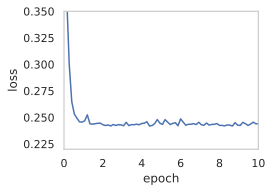

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l


def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim, num_epochs=10);

loss: 0.250, 0.261 sec/epoch


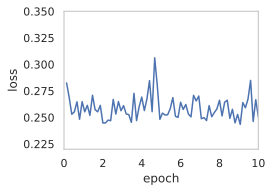

In [ ]:
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.05, 't': 1}, data_iter, feature_dim, num_epochs=10);

loss: 0.265, 0.193 sec/epoch


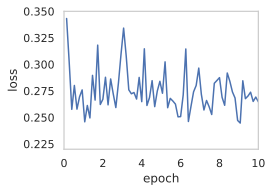

In [ ]:
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.1, 't': 1}, data_iter, feature_dim, num_epochs=10);

### 练习11.10.2
试着重写动量和二次矩更新，从而使其不需要偏差校正

**解答：**

In [ ]:
def init_adam_states_update(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam_update(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    hyperparams['t'] += 1  # 先增加 t 的值
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])  # 去除偏差校正
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])  # 去除偏差校正
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr) + eps)
        p.grad.data.zero_()

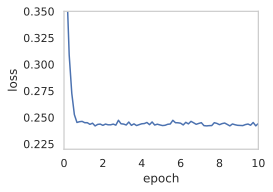

In [ ]:
d2l.train_ch11(adam_update, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim, num_epochs=10);

loss: 0.303, 0.225 sec/epoch


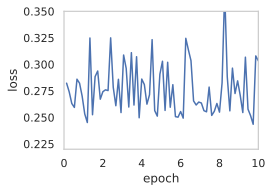

In [ ]:
d2l.train_ch11(adam_update, init_adam_states(feature_dim),
               {'lr': 0.1, 't': 1}, data_iter, feature_dim, num_epochs=10);

### 练习11.10.3
收敛时为什么需要降低学习率$\eta$?

**解答：**

在Adam算法中，有两个关键的超参数：学习率$\eta$和指数衰减率$\beta_1$、$\beta_2$。

当Adam算法收敛时，降低学习率$\eta$的原因如下：

1. **动量的影响**：
   Adam算法利用动量来加速梯度下降过程，动量可以帮助算法跳出局部极小值并加速在平坦区域的移动。然而，在接近收敛时，我们希望算法逐渐减缓速度，以避免在极小值附近来回震荡。

2. **过大的学习率会导致震荡**：
   如果学习率$\eta$过大，那么在收敛阶段，更新步长可能会过大，使得算法在极小值附近来回震荡，而无法稳定地收敛。

3. **稳定性和精度**：
   当接近最优解时，我们希望算法收敛得更加精确和稳定。通过降低学习率，我们可以确保算法在接近最优解时，以更小的步长进行微调，从而更加精确地找到最优解。

4. **避免“振荡”**：
   在接近最优解时，如果学习率$\eta$过大，可能会导致优化过程在最优解附近来回震荡，而无法稳定地收敛。通过降低学习率，可以减缓更新的速度，避免这种振荡现象。

所以，当Adam算法接近收敛时，逐步降低学习率$\eta$是为了保证优化过程的稳定性和精确性，避免在最优解附近震荡，并最终找到一个满足要求的最优解。

### 练习11.10.4
尝试构造一个使用Adam算法会发散而Yogi会收敛的例子。

**解答：**

In [ ]:
def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-1 # adam的eps调大
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)+ eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1


In [ ]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6 #yogi的eps调小
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = s + (1 - beta2) * torch.sign(
                torch.square(p.grad) - s) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)+ eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1


loss: 0.286, 0.254 sec/epoch


([0.02502727508544922,
  0.05432486534118652,
  0.07659363746643066,
  0.09993433952331543,
  0.12483882904052734,
  0.1624300479888916,
  0.2031557559967041,
  0.23590397834777832,
  0.2621176242828369,
  0.29068803787231445,
  0.31475114822387695,
  0.33946847915649414,
  0.3629024028778076,
  0.4381234645843506,
  0.5079770088195801],
 [0.2802133682370186,
  0.24929887652397156,
  0.25547001020113624,
  0.2572503798007965,
  0.25765814197063447,
  0.25446937972307204,
  0.24969262937704723,
  0.2474356138308843,
  0.2543005377848943,
  0.26428999155759814,
  0.26891206375757853,
  0.2554288481871287,
  0.25635744649171827,
  0.27924392398198444,
  0.28562702345848084])

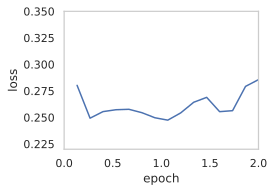

In [ ]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim), {'lr': 0.1, 't': 1}, data_iter, feature_dim)

loss: 0.245, 0.198 sec/epoch


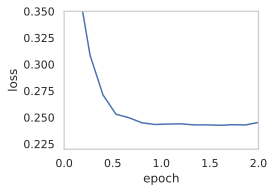

In [ ]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(yogi, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

## 11.11 学习率调度器

### 练习11.11.1
试验给定固定学习率的优化行为。这种情况下可以获得的最佳模型是什么？

**解答：**

KeyboardInterrupt: ignored

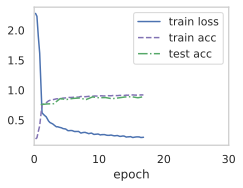

In [ ]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.optim import lr_scheduler
from d2l import torch as d2l


def net_fn():
    model = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(16 * 5 * 5, 120), nn.ReLU(),
        nn.Linear(120, 84), nn.ReLU(),
        nn.Linear(84, 10))

    return model

loss = nn.CrossEntropyLoss()
device = d2l.try_gpu()

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

# 代码几乎与d2l.train_ch6定义在卷积神经网络一章LeNet一节中的相同
def train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
          scheduler=None):
    net.to(device)
    animator = d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])

    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)  # train_loss,train_acc,num_examples
        for i, (X, y) in enumerate(train_iter):
            net.train()
            trainer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            train_loss = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % 50 == 0:
                animator.add(epoch + i / len(train_iter),
                             (train_loss, train_acc, None))

        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch+1, (None, None, test_acc))

        if scheduler:
            if scheduler.__module__ == lr_scheduler.__name__:
                # UsingPyTorchIn-Builtscheduler
                scheduler.step()
            else:
                # Usingcustomdefinedscheduler
                for param_group in trainer.param_groups:
                    param_group['lr'] = scheduler(epoch)

    print(f'train loss {train_loss:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')

lr, num_epochs = 0.3, 30
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device)


In [ ]:
lr = 0.1
trainer.param_groups[0]["lr"] = lr
print(f'learning rate is now {trainer.param_groups[0]["lr"]:.2f}')


In [ ]:
class SquareRootScheduler:
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * pow(num_update + 1.0, -0.5)

class CosineScheduler:
    def __init__(self, max_update, base_lr=0.01, final_lr=0,
               warmup_steps=0, warmup_begin_lr=0):
        self.base_lr_orig = base_lr
        self.max_update = max_update
        self.final_lr = final_lr
        self.warmup_steps = warmup_steps
        self.warmup_begin_lr = warmup_begin_lr
        self.max_steps = self.max_update - self.warmup_steps

    def get_warmup_lr(self, epoch):
        increase = (self.base_lr_orig - self.warmup_begin_lr) \
                       * float(epoch) / float(self.warmup_steps)
        return self.warmup_begin_lr + increase

    def __call__(self, epoch):
        if epoch < self.warmup_steps:
            return self.get_warmup_lr(epoch)
        if epoch <= self.max_update:
            self.base_lr = self.final_lr + (
                self.base_lr_orig - self.final_lr) * (1 + math.cos(
                math.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2
        return self.base_lr



In [ ]:
scheduler = CosineScheduler(max_update=20, base_lr=0.3, final_lr=0.01)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

scheduler = SquareRootScheduler(lr=0.1)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

In [ ]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)

### 练习11.11.2
如果改变学习率下降的指数，收敛性会如何改变？在实验中方便起见，使用`PolyScheduler`。


**解答：**

In [ ]:
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import PolynomialLR

net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr)
# 定义PolyScheduler并设置参数
scheduler = PolynomialLR(trainer, total_iters=10, power=0.9)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)

### 练习11.11.3
将余弦调度器应用于大型计算机视觉问题，例如训练ImageNet数据集。与其他调度器相比，它如何影响性能？



**解答：**

与其他调度器相比，余弦调度器在性能方面有一些独特的影响。

1. 初始学习率设置：余弦调度器要求设置一个初始学习率。通常情况下，较大的学习率可以加快模型的收敛速度，但同时也可能导致训练过程中的不稳定性。因此，选择一个合适的初始学习率对于获得较好的性能至关重要。

2. 学习率下降：余弦调度器通过在训练过程中逐渐降低学习率来优化模型的训练。它使用了余弦函数的形式来调整学习率，使其在训练的不同阶段按照一种平滑的方式进行下降。这种方式相对于其他调度器（如固定学习率或按照一定步长进行衰减的调度器）可以更好地平衡模型的收敛速度和稳定性。

3. 阶段划分：余弦调度器将整个训练过程划分为多个阶段，每个阶段具有不同的学习率。这些阶段的划分可以根据训练数据的大小和复杂性进行调整。通常情况下，初始阶段使用较大的学习率以加快模型的收敛，后续阶段逐渐降低学习率以确保模型更好地拟合数据。

4. 平滑下降：余弦调度器的学习率下降过程相对平滑，不像其他调度器那样存在突然的学习率变化。这种平滑的下降可以帮助模型避免陷入局部极小值，并且在优化过程中更容易跳出局部极小值并找到全局最优解。

余弦调度器在大型计算机视觉问题中的应用可以通过逐渐降低学习率、平滑下降以及合理的阶段划分来提升性能。它可以帮助模型更好地收敛，避免过拟合，并在训练过程中更好地平衡收敛速度和稳定性。

### 练习11.11.4
预热应该持续多长时间？


**解答：**

预热时间的选择可以基于以下几个因素进行考虑：

- 模型的复杂性：复杂的模型可能需要更长的预热时间来帮助模型更好地收敛。较简单的模型可能在较短的预热时间内就能达到较好的性能。

- 数据集的大小：大型数据集通常需要更长的预热时间，因为模型需要更多的迭代次数来适应数据集的复杂性。相反，小型数据集可能在较短的预热时间内就能够达到较好的性能。

- 训练时间和计算资源：预热时间的选择还应考虑到可用的训练时间和计算资源。如果时间和资源有限，可能需要选择较短的预热时间来加快模型的训练速度。

一种常见的做法是通过观察模型的训练曲线和验证集的性能来确定预热时间。可以尝试不同的预热时间，并观察模型在训练过程中的性能变化。如果模型在预热阶段表现不稳定或训练损失仍然很高，可能需要增加预热时间。相反，如果模型在较短的预热时间内就能达到较好的性能，可以考虑减少预热时间以加快训练速度。

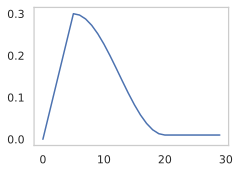

In [ ]:
scheduler = CosineScheduler(20, warmup_steps=5, base_lr=0.3, final_lr=0.01)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

### 练习11.11.5
可以试着把优化和采样联系起来吗？首先，在随机梯度朗之万动力学上使用的结果。

**解答：**

- 随机梯度下降（SGD）：在优化神经网络中，随机梯度下降是一种常用的优化算法。它通过使用每个训练样本的随机梯度来更新模型的参数。SGD的主要思想是沿着梯度方向更新参数，以最小化损失函数。

- 朗之万动力学（Langevin Dynamics）：朗之万动力学是一种物理学中的模型，用于描述粒子在势能场中的随机运动。将朗之万动力学引入优化中，可以通过在参数更新中添加随机扰动来模拟参数的随机变化。这种随机性可以帮助模型跳出局部极小值，并在优化过程中探索更广阔的参数空间。

结合SGD和朗之万动力学的特点，于是有了SGLD算法

**SGLD算法**：SGLD算法结合了随机梯度下降和朗之万动力学。它在每次参数更新时，使用随机梯度下降的步骤进行参数更新，并添加一个朗之万动力学的随机扰动项。这个随机扰动项是由高斯噪声和学习率控制的。通过这种方式，SGLD算法可以在优化过程中进行采样，从而估计参数的后验分布。